# Table of Contents
1. [Average Case](#urea-model-average-case)
2. [Best Case](#urea-model-best-case)
3. [Worst Case](#urea-model-worst-case)

# Urea Model Average Case

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureamarchupdateavg2.csv")
df_96on = data[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea']][0:1056]
df_96on.tail()

,Date,Crude,Corn,Coal_RDF(MLR),Coal_RDF(RDF),Urea
1051,2/26/2016,34.58,359.50,50.45,50.45,265
1052,3/4/2016,37.75,358.25,51.00,51.00,270
1053,3/11/2016,40.09,365.00,51.50,51.50,274
1054,3/18/2016,41.14,371.75,52.20,52.20,265
1055,3/25/2016,40.63,374.50,51.75,51.75,255


In [2]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

Date             datetime64[ns]
Crude                   float64
Corn                    float64
Coal_RDF(MLR)           float64
Coal_RDF(RDF)           float64
Urea                    float64
dtype: object

In [3]:
df_96on.describe() #make sure both coals are the same

,Crude,Corn,Coal_RDF(MLR),Coal_RDF(RDF),Urea
count,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,54.851648,361.660275,58.312026,58.312026,260.121212
std,31.319022,157.085607,33.658418,33.658418,135.997458
min,11.260000,182.500000,20.900000,20.900000,83.000000
25%,26.402500,231.000000,27.425593,27.425593,150.750000
50%,49.655000,322.750000,51.925000,51.925000,240.000000
75%,82.082500,425.562500,80.175000,80.175000,335.000000
max,145.860000,809.250000,192.500000,192.500000,825.000000


In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#fit a OLS model with all, see how R^2 changes
X = df_96on[['Crude','Corn','Coal_RDF(MLR)']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     1599.
Date:                Thu, 07 Apr 2016   Prob (F-statistic):               0.00
Time:                        07:20:44   Log-Likelihood:                -5779.9
No. Observations:                1056   AIC:                         1.157e+04
Df Residuals:                    1052   BIC:                         1.159e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            22.1189      4.530      4.882      0.000        13.229    31.008
Crude             1.6519      0.128     12.884      0.000         1.400     1.904
Corn              0.1466      0.021      7.060      0.000         0.106     0.187
Coal_RDF(MLR)     1.6182      0.136     11.856      0.000         1.350     1.886
==============================================================================
Omnibus:                      320.293   Durbin-Watson:                   0.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1774.346
Skew:                           1.282   Prob(JB):                         0.00
Kurtosis:                       8.810   Cond. No.                     1.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
X = df_96on[['Crude','Corn','Coal_RDF(RDF)']]
Y = df_96on[['Urea']]
X= sm.add_constant(X)
est= sm.OLS(Y,X).fit()
est.summary()
#should be the same as the above one

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Urea   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     1599.
Date:                Thu, 07 Apr 2016   Prob (F-statistic):               0.00
Time:                        07:20:45   Log-Likelihood:                -5779.9
No. Observations:                1056   AIC:                         1.157e+04
Df Residuals:                    1052   BIC:                         1.159e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const            22.1189      4.530      4.882      0.000        13.229    31.008
Crude             1.6519      0.128     12.884      0.000         1.400     1.904
Corn              0.1466      0.021      7.060      0.000         0.106     0.187
Coal_RDF(RDF)     1.6182      0.136     11.856      0.000         1.350     1.886
==============================================================================
Omnibus:                      320.293   Durbin-Watson:                   0.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1774.346
Skew:                           1.282   Prob(JB):                         0.00
Kurtosis:                       8.810   Cond. No.                     1.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
X = df_96on[['Crude','Corn','Coal_RDF(MLR)']].values #coal_rdf(rdf) same as the mlr one but not later on in predicted sec
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 251.536, test: 1283.753
R^2 train: 0.987, test: 0.916
[ 0.60006758  0.09829647  0.30163595]


In [7]:
#comparing the different models
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
df_96on['Urea_Pred_RDF(MLR)'] = urea_predicted3
rdf_error3 = (abs(df_96on['Urea_Pred_RDF(MLR)'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_Top3_Error(MLR)'] = rdf_error3

urea_predicted4 = forest.predict(X)
urea_predicted4 = pd.DataFrame(urea_predicted4)
df_96on['Urea_Pred_RDF(RDF)'] = urea_predicted4
rdf_error4 = (abs(df_96on['Urea_Pred_RDF(RDF)'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_Top3_Error(MLR)'] = rdf_error4

mlrtop3_predicted = 22.1189 + (df_96on['Crude']*1.6519) + (df_96on['Corn']*0.1466) + (df_96on['Coal_RDF(MLR)']*1.6182) 
df_96on['Urea_Pred_MLR(MLR)'] = mlrtop3_predicted
mlrtop3_error = (abs(df_96on['Urea_Pred_MLR(MLR)'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Error(MLR)'] = mlrtop3_error

mlrtop3_predicted2 = 22.1189 + (df_96on['Crude']*1.6519) + (df_96on['Corn']*0.1466) + (df_96on['Coal_RDF(RDF)']*1.6182) 
df_96on['Urea_Pred_MLR(RDF)'] = mlrtop3_predicted2
mlrtop3_error2 = (abs(df_96on['Urea_Pred_MLR(RDF)'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Error(RDF)'] = mlrtop3_error2

print("Average RDF(MLR) error is: %.3f" % (rdf_error3.mean())) 
print("Average RDF(RDF) error is: %.3f" % (rdf_error4.mean()))
print("Average MLR(MLR) Top3 error is: %.3f" % (mlrtop3_error.mean()))
print("Average MLR(RDF) Top3 error is: %.3f" % (mlrtop3_error2.mean()))

df_96on

Average RDF(MLR) error is: 5.287
Average RDF(RDF) error is: 5.287
Average MLR(MLR) Top3 error is: 16.762
Average MLR(RDF) Top3 error is: 16.762


,Date,Crude,Corn,Coal_RDF(MLR),Coal_RDF(RDF),Urea,Urea_Pred_RDF(MLR),RDF_Top3_Error(MLR),Urea_Pred_RDF(RDF),Urea_Pred_MLR(MLR),MLR_Error(MLR),Urea_Pred_MLR(RDF),MLR_Error(RDF)
0,1996-01-05,19.65,369.75,25.358912,25.358912,220,202.758663,7.836971,202.758663,149.819876,31.900057,149.819876,31.900057
1,1996-01-12,17.98,366.25,25.269689,25.269689,220,209.755000,4.656818,209.755000,146.403722,33.452854,146.403722,33.452854
2,1996-01-19,18.25,365.00,29.070713,29.070713,218,203.387917,6.702791,203.387917,152.817303,29.900320,152.817303,29.900320
3,1996-01-26,17.36,360.25,29.195096,29.195096,215,204.239583,5.004845,204.239583,150.852038,29.836261,150.852038,29.836261
4,1996-02-02,17.38,370.50,32.105527,32.105527,205,200.750994,2.072686,200.750994,157.097386,23.367129,157.097386,23.367129
5,1996-02-09,17.38,367.25,28.667889,28.667889,205,200.166012,2.358043,200.166012,151.058149,26.313098,151.058149,26.313098
6,1996-02-16,18.40,382.75,28.169393,28.169393,210,200.691839,4.432458,200.691839,154.208722,26.567275,154.208722,26.567275
7,1996-02-23,18.45,383.50,28.828182,28.828182,210,203.415595,3.135431,203.415595,155.467319,25.967943,155.467319,25.967943
8,1996-03-01,18.62,386.75,27.863549,27.863549,210,195.763762,6.779161,195.763762,154.663623,26.350656,154.663623,26.350656
9,1996-03-08,18.87,388.50,26.513218,26.513218,205,186.159112,9.190677,186.159112,153.148042,25.293638,153.148042,25.293638


In [8]:
newpred2 = data [['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)']][1056:]
newpred = data [['Crude','Corn','Coal_RDF(MLR)']][1056:]
newpred3 = data[['Crude','Corn','Coal_RDF(RDF)']][1056:]

In [9]:
#new predictions
X = df_96on[['Crude','Corn','Coal_RDF(MLR)']].values #coal_rdf(rdf) same as the mlr one but not later on in predicted sec
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)']
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Urea_Pred_RDF(MLR)'] = df_new_pred

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 259.273, test: 1342.579
R^2 train: 0.987, test: 0.912
[ 0.55535172  0.09745695  0.34719132]


,Date,Crude,Corn,Coal_RDF(MLR),Coal_RDF(RDF),Urea_Pred_RDF(MLR)
0,2016-03-26,40.63,374.5,52.141,52.2996,257.226655
1,2016-03-27,40.63,374.5,52.141,52.2996,257.226655
2,2016-03-28,40.53,370.5,52.141,53.059,257.138454
3,2016-03-29,39.51,373,53.0023,53.5602,237.943225
4,2016-03-30,39.66,367,53.1493,53.7676,243.327597
5,2016-03-31,39.36,351.5,53.1866,57.4817,245.268985
6,2016-04-01,39.55,372.991,52.141,52.2996,244.141392
7,2016-04-02,39.52,372.974,52.1103,52.2996,243.913010
8,2016-04-03,39.49,372.957,52.1103,52.2996,243.466343
9,2016-04-04,39.46,372.94,52.1103,52.2996,243.466343


In [10]:
X = df_96on[['Crude','Corn','Coal_RDF(RDF)']].values #coal_rdf(rdf) same as the mlr one but not later on in predicted sec
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
newpred_predicted2 = forest.predict(newpred3)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred2['Urea_Pred_RDF(RDF)'] = df_new_pred2

mlrtop3_predicted5 = 22.1189 + (newpred2['Crude']*1.6519) + (newpred2['Corn']*0.1466) + (newpred2['Coal_RDF(MLR)']*1.6182) 
newpred2['Urea_Pred_MLR(MLR)'] = mlrtop3_predicted5

mlrtop3_predicted6 = 22.1189 + (newpred2['Crude']*1.6519) + (newpred2['Corn']*0.1466) + (newpred2['Coal_RDF(RDF)']*1.6182) 
newpred2['Urea_Pred_MLR(RDF)'] = mlrtop3_predicted6

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 247.705, test: 1263.803
R^2 train: 0.988, test: 0.917
[ 0.60814212  0.09658585  0.29527203]


,Date,Crude,Corn,Coal_RDF(MLR),Coal_RDF(RDF),Urea_Pred_RDF(MLR),Urea_Pred_RDF(RDF),Urea_Pred_MLR(MLR),Urea_Pred_MLR(RDF)
0,2016-03-26,40.63,374.5,52.141,52.2996,257.226655,255.993304,228.512,228.769
1,2016-03-27,40.63,374.5,52.141,52.2996,257.226655,255.993304,228.512,228.769
2,2016-03-28,40.53,370.5,52.141,53.059,257.138454,246.315642,227.76,229.246
3,2016-03-29,39.51,373,53.0023,53.5602,237.943225,238.132540,227.836,228.738
4,2016-03-30,39.66,367,53.1493,53.7676,243.327597,245.579040,227.442,228.442
5,2016-03-31,39.36,351.5,53.1866,57.4817,245.268985,255.014989,224.734,231.684
6,2016-04-01,39.55,372.991,52.141,52.2996,244.141392,242.649550,226.507,226.763
7,2016-04-02,39.52,372.974,52.1103,52.2996,243.913010,242.125800,226.405,226.711
8,2016-04-03,39.49,372.957,52.1103,52.2996,243.466343,241.956133,226.353,226.659
9,2016-04-04,39.46,372.94,52.1103,52.2996,243.466343,241.956133,226.301,226.607


In [11]:
frames = [df_96on,newpred2]
combined = pd.concat(frames)
combined

,Coal_RDF(MLR),Coal_RDF(RDF),Corn,Crude,Date,MLR_Error(MLR),MLR_Error(RDF),RDF_Top3_Error(MLR),Urea,Urea_Pred_MLR(MLR),Urea_Pred_MLR(RDF),Urea_Pred_RDF(MLR),Urea_Pred_RDF(RDF)
0,25.3589,25.3589,369.75,19.65,1996-01-05,31.900057,31.900057,7.836971,220,149.82,149.82,202.758663,202.758663
1,25.2697,25.2697,366.25,17.98,1996-01-12,33.452854,33.452854,4.656818,220,146.404,146.404,209.755000,209.755000
2,29.0707,29.0707,365,18.25,1996-01-19,29.900320,29.900320,6.702791,218,152.817,152.817,203.387917,203.387917
3,29.1951,29.1951,360.25,17.36,1996-01-26,29.836261,29.836261,5.004845,215,150.852,150.852,204.239583,204.239583
4,32.1055,32.1055,370.5,17.38,1996-02-02,23.367129,23.367129,2.072686,205,157.097,157.097,200.750994,200.750994
5,28.6679,28.6679,367.25,17.38,1996-02-09,26.313098,26.313098,2.358043,205,151.058,151.058,200.166012,200.166012
6,28.1694,28.1694,382.75,18.4,1996-02-16,26.567275,26.567275,4.432458,210,154.209,154.209,200.691839,200.691839
7,28.8282,28.8282,383.5,18.45,1996-02-23,25.967943,25.967943,3.135431,210,155.467,155.467,203.415595,203.415595
8,27.8635,27.8635,386.75,18.62,1996-03-01,26.350656,26.350656,6.779161,210,154.664,154.664,195.763762,195.763762
9,26.5132,26.5132,388.5,18.87,1996-03-08,25.293638,25.293638,9.190677,205,153.148,153.148,186.159112,186.159112


In [65]:
combined.to_csv("C:/Users/msteinme/Documents/ureaavgmarch2.csv")

In [12]:
combined = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']
combined


,Date,Crude,Corn,Coal_RDF(MLR),Coal_RDF(RDF),Urea,Urea_Pred_MLR(MLR),Urea_Pred_MLR(RDF),Urea_Pred_RDF(MLR),Urea_Pred_RDF(RDF)
0,1996-01-05 00:00:00,19.65,369.75,25.3589,25.3589,220,149.82,149.82,202.759,202.759
1,1996-01-12 00:00:00,17.98,366.25,25.2697,25.2697,220,146.404,146.404,209.755,209.755
2,1996-01-19 00:00:00,18.25,365,29.0707,29.0707,218,152.817,152.817,203.388,203.388
3,1996-01-26 00:00:00,17.36,360.25,29.1951,29.1951,215,150.852,150.852,204.24,204.24
4,1996-02-02 00:00:00,17.38,370.5,32.1055,32.1055,205,157.097,157.097,200.751,200.751
5,1996-02-09 00:00:00,17.38,367.25,28.6679,28.6679,205,151.058,151.058,200.166,200.166
6,1996-02-16 00:00:00,18.4,382.75,28.1694,28.1694,210,154.209,154.209,200.692,200.692
7,1996-02-23 00:00:00,18.45,383.5,28.8282,28.8282,210,155.467,155.467,203.416,203.416
8,1996-03-01 00:00:00,18.62,386.75,27.8635,27.8635,210,154.664,154.664,195.764,195.764
9,1996-03-08 00:00:00,18.87,388.5,26.5132,26.5132,205,153.148,153.148,186.159,186.159


In [51]:
#monthly predictions this model is not 2 months in advance
jan_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][0:4]
feb_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][4:8]
mar_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][8:13]
apr_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][13:17]
may_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][17:22]
jun_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][22:26]
jul_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][26:30]
aug_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][30:35]
sep_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][35:39]
oct_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][39:43]
nov_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][43:48]
dec_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][48:52]
jan_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][52:57]
feb_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][57:61]
mar_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][61:65]
apr_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][65:69]
may_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][69:74]
jun_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][74:78]
jul_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][78:82]
aug_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][82:87]
sep_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][87:91]
oct_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][91:96]
nov_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][96:100]
dec_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][100:104]
jan_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][104:109]
feb_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][109:113]
mar_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][113:117]
apr_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][117:121]
may_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][121:126]
jun_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][126:130]
jul_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][130:135]
aug_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][135:139]
sep_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][139:143]
oct_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][143:148]
nov_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][148:152]
dec_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][152:156]
jan_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][156:161]
feb_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][161:165]
mar_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][165:169]
apr_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][169:174]
may_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][174:178]
jun_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][178:182]
jul_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][182:187]
aug_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][187:191]
sep_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][191:195]
oct_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][195:200]
nov_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][200:204]
dec_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][204:209]
jan_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][209:213]
feb_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][213:217]
mar_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][217:222]
apr_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][222:226]
may_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][226:230]
jun_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][230:235]
jul_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][235:239]
aug_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][239:243]
sep_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][243:248]
oct_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][248:252]
nov_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][252:256]
dec_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][256:261]
jan_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][261:265]
feb_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][265:269]
mar_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][269:274]
apr_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][274:278]
may_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][278:282]
jun_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][282:287]
jul_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][287:291]
aug_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][291:296]
sep_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][296:300]
oct_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][300:304]
nov_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][304:309]
dec_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][309:313]
jan_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][313:317]
feb_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][317:321]
mar_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][321:326]
apr_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][326:330]
may_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][330:335]
jun_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][335:339]
jul_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][339:343]
aug_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][343:348]
sep_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][348:352]
oct_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][352:356]
nov_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][356:361]
dec_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][361:365]
jan_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][365:370]
feb_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][370:374]
mar_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][374:378]
apr_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][378:382]
may_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][382:387]
jun_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][387:391]
jul_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][391:395]
aug_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][395:400]
sep_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][400:404]
oct_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][404:409]
nov_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][409:413]
dec_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][413:417]
jan_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][417:422]
feb_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][422:426]
mar_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][426:430]
apr_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][430:435]
may_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][435:439]
jun_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][439:443]
jul_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][443:448]
aug_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][448:452]
sep_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][452:456]
oct_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][456:461]
nov_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][461:465]
dec_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][465:470]
jan_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][470:474]
feb_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][474:478]
mar_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][478:482]
apr_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][482:487]
may_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][487:491]
jun_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][491:495]
jul_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][495:500]
aug_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][500:504]
sep_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][504:509]
oct_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][509:513]
nov_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][513:517]
dec_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][517:522]
jan_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][522:526]
feb_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][526:530]
mar_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][530:535]
apr_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][535:539]
may_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][539:543]
jun_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][543:548]
jul_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][548:552]
aug_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][552:556]
sep_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][556:561]
oct_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][561:565]
nov_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][565:569]
dec_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][569:574]
jan_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][574:578]
feb_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][578:582]
mar_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][582:587]
apr_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][587:591]
may_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][591:595]
jun_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][595:600]
jul_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][600:604]
aug_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][604:609]
sep_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][609:613]
oct_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][613:617]
nov_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][617:622]
dec_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][622:626]
jan_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][626:630]
feb_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][630:635]
mar_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][635:639]
apr_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][639:643]
may_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][643:648]
jun_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][648:652]
jul_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][652:656]
aug_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][656:661]
sep_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][661:665]
oct_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][665:670]
nov_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][670:674]
dec_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][674:678]
jan_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][678:683]
feb_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][683:687]
mar_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][687:691]
apr_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][691:695]
may_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][695:700]
jun_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][700:704]
jul_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][704:709]
aug_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][709:713]
sep_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][713:717]
oct_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][717:722]
nov_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][722:726]
dec_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][726:730]
jan_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][730:735]
feb_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][735:739]
mar_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][739:743]
apr_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][743:748]
may_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][748:752]
jun_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][752:756]
jul_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][756:761]
aug_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][761:765]
sep_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][765:769]
oct_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][769:774]
nov_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][774:778]
dec_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][778:783]
jan_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][783:787]
feb_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][787:791]
mar_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][791:795]
apr_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][795:800]
may_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][800:804]
jun_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][804:808]
jul_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][808:813]
aug_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][813:817]
sep_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][817:822]
oct_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][822:826]
nov_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][826:830]
dec_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][830:835]
jan_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][835:839]
feb_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][839:843]
mar_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][843:848]
apr_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][848:852]
may_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][852:856]
jun_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][856:861]
jul_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][861:865]
aug_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][865:870]
sep_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][870:874]
oct_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][874:878]
nov_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][878:883]
dec_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][883:887]
jan_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][887:891]
feb_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][891:895]
mar_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][895:900]
apr_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][900:904]
may_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][904:909]
jun_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][909:913]
jul_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][913:917]
aug_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][917:922]
sep_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][922:926]
oct_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][926:930]
nov_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][930:935]
dec_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][935:939]
jan_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][939:944]
feb_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][944:948]
mar_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][948:952]
apr_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][952:956]
may_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][956:961]
jun_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][961:965]
jul_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][965:969]
aug_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][969:974]
sep_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][974:978]
oct_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][978:983]
nov_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][983:987]
dec_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][987:991]
jan_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][991:996]
feb_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][996:1000]
mar_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1000:1004]
apr_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1004:1008]
may_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1008:1013]
jun_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1013:1017]
jul_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1017:1022]
aug_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1022:1026]
sep_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1026:1030]
oct_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1030:1035]
nov_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1035:1039]
dec_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1039:1043]
jan_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1043:1048]
feb_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1048:1052]
mar_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1052:1056]
mar_16

,Date,Crude,Corn,Coal_RDF(MLR),Coal_RDF(RDF),Urea,Urea_Pred_MLR(MLR),Urea_Pred_MLR(RDF),Urea_Pred_RDF(MLR),Urea_Pred_RDF(RDF)
1052,2016-03-04 00:00:00,37.75,358.25,51,51,270,219.526,219.526,260.837,260.837
1053,2016-03-11 00:00:00,40.09,365,51.5,51.5,274,225.19,225.19,265.749,265.749
1054,2016-03-18 00:00:00,41.14,371.75,52.2,52.2,265,229.047,229.047,257.253,257.253
1055,2016-03-25 00:00:00,40.63,374.5,51.75,51.75,255,227.879,227.879,257.07,257.07


In [37]:
# predicted chunk
apr_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1062:1092]
may_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1092:1123]
jun_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1123:1153]
jul_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1153:1184]
aug_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1184:1215]
sep_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1215:1245]
oct_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1245:1276]
nov_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1276:1306]
dec_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1306:1337]
jan_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1337:1368]
feb_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1368:1396]
mar_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1396:1427]
apr_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1427:1457]
may_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1457:1488]
jun_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1488:1518]
jul_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1518:1549]
aug_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1549:1580]
sep_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1580:1610]
oct_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1610:1641]
nov_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1641:1671]
dec_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1671:1702]
jan_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1702:1733]
feb_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1733:1761]
mar_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1761:1792]
apr_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1792:1822]
may_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1822:1853]
jun_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1853:1883]
jul_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1883:1914]
aug_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1914:1945]
sep_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1945:1975]
oct_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1975:2006]
nov_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2006:2036]
dec_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2036:2067]
jan_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2067:2098]
feb_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2098:2126]
mar_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2126:2157]
apr_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2157:2187]
may_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2187:2218]
jun_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2218:2248]
jul_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2248:2279]
aug_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2279:2310]
sep_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2310:2340]
oct_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2340:2371]
nov_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2371:2401]
dec_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2401:2432]
jan_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2432:2463]
feb_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2463:2492]
mar_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2492:2523]
apr_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2523:2553]
may_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2553:2584]
jun_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2584:2614]
jul_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2614:2645]
aug_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2645:2676]
sep_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2676:2706]
oct_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2706:2737]
nov_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2737:2767]
dec_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2767:2798]


In [38]:
mycolumns = ['Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']
df = pd.DataFrame(columns=mycolumns)
rows = [jan_96[mycolumns].mean(),feb_96[mycolumns].mean(),
        mar_96[mycolumns].mean(),apr_96[mycolumns].mean(),may_96[mycolumns].mean(),jun_96[mycolumns].mean(),
        jul_96[mycolumns].mean(),aug_96[mycolumns].mean(),sep_96[mycolumns].mean(),oct_96[mycolumns].mean(),nov_96[mycolumns].mean(),dec_96[mycolumns].mean(),
        jan_97[mycolumns].mean(),feb_97[mycolumns].mean(),mar_97[mycolumns].mean(),apr_97[mycolumns].mean(),may_97[mycolumns].mean(),jun_97[mycolumns].mean(),
        jul_97[mycolumns].mean(),aug_97[mycolumns].mean(),sep_97[mycolumns].mean(),oct_97[mycolumns].mean(),nov_97[mycolumns].mean(),dec_97[mycolumns].mean(),
        jan_98[mycolumns].mean(),feb_98[mycolumns].mean(),mar_98[mycolumns].mean(),apr_98[mycolumns].mean(),may_98[mycolumns].mean(),jun_98[mycolumns].mean(),
        jul_98[mycolumns].mean(),aug_98[mycolumns].mean(),sep_98[mycolumns].mean(),oct_98[mycolumns].mean(),nov_98[mycolumns].mean(),dec_98[mycolumns].mean(),
        jan_99[mycolumns].mean(),feb_99[mycolumns].mean(),mar_99[mycolumns].mean(),apr_99[mycolumns].mean(),may_99[mycolumns].mean(),jun_99[mycolumns].mean(),
        jul_99[mycolumns].mean(),aug_99[mycolumns].mean(),sep_99[mycolumns].mean(),oct_99[mycolumns].mean(),nov_99[mycolumns].mean(),dec_99[mycolumns].mean(),
        jan_00[mycolumns].mean(),feb_00[mycolumns].mean(),mar_00[mycolumns].mean(),apr_00[mycolumns].mean(),may_00[mycolumns].mean(),jun_00[mycolumns].mean(),
        jul_00[mycolumns].mean(),aug_00[mycolumns].mean(),sep_00[mycolumns].mean(),oct_00[mycolumns].mean(),nov_00[mycolumns].mean(),dec_00[mycolumns].mean(),
        jan_01[mycolumns].mean(),feb_01[mycolumns].mean(),mar_01[mycolumns].mean(),apr_01[mycolumns].mean(),may_01[mycolumns].mean(),jun_01[mycolumns].mean(),
        jul_01[mycolumns].mean(),aug_01[mycolumns].mean(),sep_01[mycolumns].mean(),oct_01[mycolumns].mean(),nov_01[mycolumns].mean(),dec_01[mycolumns].mean(),
        jan_02[mycolumns].mean(),feb_02[mycolumns].mean(),mar_02[mycolumns].mean(),apr_02[mycolumns].mean(),may_02[mycolumns].mean(),jun_02[mycolumns].mean(),
        jul_02[mycolumns].mean(),aug_02[mycolumns].mean(),sep_02[mycolumns].mean(),oct_02[mycolumns].mean(),nov_02[mycolumns].mean(),dec_02[mycolumns].mean(),
        jan_03[mycolumns].mean(),feb_03[mycolumns].mean(),mar_03[mycolumns].mean(),apr_03[mycolumns].mean(),may_03[mycolumns].mean(),jun_03[mycolumns].mean(),
        jul_03[mycolumns].mean(),aug_03[mycolumns].mean(),sep_03[mycolumns].mean(),oct_03[mycolumns].mean(),nov_03[mycolumns].mean(),dec_03[mycolumns].mean(),
        jan_04[mycolumns].mean(),feb_04[mycolumns].mean(),mar_04[mycolumns].mean(),apr_04[mycolumns].mean(),may_04[mycolumns].mean(),jun_04[mycolumns].mean(),
        jul_04[mycolumns].mean(),aug_04[mycolumns].mean(),sep_04[mycolumns].mean(),oct_04[mycolumns].mean(),nov_04[mycolumns].mean(),dec_04[mycolumns].mean(),
        jan_05[mycolumns].mean(),feb_05[mycolumns].mean(),mar_05[mycolumns].mean(),apr_05[mycolumns].mean(),may_05[mycolumns].mean(),jun_05[mycolumns].mean(),
        jul_05[mycolumns].mean(),aug_05[mycolumns].mean(),sep_05[mycolumns].mean(),oct_05[mycolumns].mean(),nov_05[mycolumns].mean(),dec_05[mycolumns].mean(),
        jan_06[mycolumns].mean(),feb_06[mycolumns].mean(),mar_06[mycolumns].mean(),apr_06[mycolumns].mean(),may_06[mycolumns].mean(),jun_06[mycolumns].mean(),
        jul_06[mycolumns].mean(),aug_06[mycolumns].mean(),sep_06[mycolumns].mean(),oct_06[mycolumns].mean(),nov_06[mycolumns].mean(),dec_06[mycolumns].mean(),
        jan_07[mycolumns].mean(),feb_07[mycolumns].mean(),mar_07[mycolumns].mean(),apr_07[mycolumns].mean(),may_07[mycolumns].mean(),jun_07[mycolumns].mean(),
        jul_07[mycolumns].mean(),aug_07[mycolumns].mean(),sep_07[mycolumns].mean(),oct_07[mycolumns].mean(),nov_07[mycolumns].mean(),dec_07[mycolumns].mean(),
        jan_08[mycolumns].mean(),feb_08[mycolumns].mean(),mar_08[mycolumns].mean(),apr_08[mycolumns].mean(),may_08[mycolumns].mean(),jun_08[mycolumns].mean(),
        jul_08[mycolumns].mean(),aug_08[mycolumns].mean(),sep_08[mycolumns].mean(),oct_08[mycolumns].mean(),nov_08[mycolumns].mean(),dec_08[mycolumns].mean(),
        jan_09[mycolumns].mean(),feb_09[mycolumns].mean(),mar_09[mycolumns].mean(),apr_09[mycolumns].mean(),may_09[mycolumns].mean(),jun_09[mycolumns].mean(),
        jul_09[mycolumns].mean(),aug_09[mycolumns].mean(),sep_09[mycolumns].mean(),oct_09[mycolumns].mean(),nov_09[mycolumns].mean(),dec_09[mycolumns].mean(),
        jan_10[mycolumns].mean(),feb_10[mycolumns].mean(),mar_10[mycolumns].mean(),apr_10[mycolumns].mean(),may_10[mycolumns].mean(),jun_10[mycolumns].mean(),
        jul_10[mycolumns].mean(),aug_10[mycolumns].mean(),sep_10[mycolumns].mean(),oct_10[mycolumns].mean(),nov_10[mycolumns].mean(),dec_10[mycolumns].mean(),
        jan_11[mycolumns].mean(),feb_11[mycolumns].mean(),mar_11[mycolumns].mean(),apr_11[mycolumns].mean(),may_11[mycolumns].mean(),jun_11[mycolumns].mean(),
        jul_11[mycolumns].mean(),aug_11[mycolumns].mean(),sep_11[mycolumns].mean(),oct_11[mycolumns].mean(),nov_11[mycolumns].mean(),dec_11[mycolumns].mean(),
        jan_12[mycolumns].mean(),feb_12[mycolumns].mean(),mar_12[mycolumns].mean(),apr_12[mycolumns].mean(),may_12[mycolumns].mean(),jun_12[mycolumns].mean(),
        jul_12[mycolumns].mean(),aug_12[mycolumns].mean(),sep_12[mycolumns].mean(),oct_12[mycolumns].mean(),nov_12[mycolumns].mean(),dec_12[mycolumns].mean(),
        jan_13[mycolumns].mean(),feb_13[mycolumns].mean(),mar_13[mycolumns].mean(),apr_13[mycolumns].mean(),may_13[mycolumns].mean(),jun_13[mycolumns].mean(),
        jul_13[mycolumns].mean(),aug_13[mycolumns].mean(),sep_13[mycolumns].mean(),oct_13[mycolumns].mean(),nov_13[mycolumns].mean(),dec_13[mycolumns].mean(),
        jan_14[mycolumns].mean(),feb_14[mycolumns].mean(),mar_14[mycolumns].mean(),apr_14[mycolumns].mean(),may_14[mycolumns].mean(),jun_14[mycolumns].mean(),
        jul_14[mycolumns].mean(),aug_14[mycolumns].mean(),sep_14[mycolumns].mean(),oct_14[mycolumns].mean(),nov_14[mycolumns].mean(),dec_14[mycolumns].mean(),
        jan_15[mycolumns].mean(),feb_15[mycolumns].mean(),mar_15[mycolumns].mean(),apr_15[mycolumns].mean(),may_15[mycolumns].mean(),jun_15[mycolumns].mean(),
        jul_15[mycolumns].mean(),aug_15[mycolumns].mean(),sep_15[mycolumns].mean(),oct_15[mycolumns].mean(),nov_15[mycolumns].mean(),dec_15[mycolumns].mean(),
        jan_16[mycolumns].mean(),feb_16[mycolumns].mean(),mar_16[mycolumns].mean(),apr_16[mycolumns].mean(),may_16[mycolumns].mean(),jun_16[mycolumns].mean(),
        jul_16[mycolumns].mean(),aug_16[mycolumns].mean(),sep_16[mycolumns].mean(),oct_16[mycolumns].mean(),nov_16[mycolumns].mean(),dec_16[mycolumns].mean(),
        jan_17[mycolumns].mean(),feb_17[mycolumns].mean(),mar_17[mycolumns].mean(),apr_17[mycolumns].mean(),may_17[mycolumns].mean(),jun_17[mycolumns].mean(),
        jul_17[mycolumns].mean(),aug_17[mycolumns].mean(),sep_17[mycolumns].mean(),oct_17[mycolumns].mean(),nov_17[mycolumns].mean(),dec_17[mycolumns].mean(),
        jan_18[mycolumns].mean(),feb_18[mycolumns].mean(),mar_18[mycolumns].mean(),apr_18[mycolumns].mean(),may_18[mycolumns].mean(),jun_18[mycolumns].mean(),
        jul_18[mycolumns].mean(),aug_18[mycolumns].mean(),sep_18[mycolumns].mean(),oct_18[mycolumns].mean(),nov_18[mycolumns].mean(),dec_18[mycolumns].mean(),
        jan_19[mycolumns].mean(),feb_19[mycolumns].mean(),mar_19[mycolumns].mean(),apr_19[mycolumns].mean(),may_19[mycolumns].mean(),jun_19[mycolumns].mean(),
        jul_19[mycolumns].mean(),aug_19[mycolumns].mean(),sep_19[mycolumns].mean(),oct_19[mycolumns].mean(),nov_19[mycolumns].mean(),dec_19[mycolumns].mean(),
        jan_20[mycolumns].mean(),feb_20[mycolumns].mean(),mar_20[mycolumns].mean(),apr_20[mycolumns].mean(),may_20[mycolumns].mean(),jun_20[mycolumns].mean(),
        jul_20[mycolumns].mean(),aug_20[mycolumns].mean(),sep_20[mycolumns].mean(),oct_20[mycolumns].mean(),nov_20[mycolumns].mean(),dec_20[mycolumns].mean()]
#puts each of those values for each of the rows
for row in rows:
    df.loc[len(df)] = row
df.tail()       

,Crude,Corn,Coal_RDF(MLR),Coal_RDF(RDF),Urea,Urea_Pred_MLR(MLR),Urea_Pred_MLR(RDF),Urea_Pred_RDF(MLR),Urea_Pred_RDF(RDF)
295,61.405479,441.747370,61.322860,62.092362,NaN,287.547427,288.792636,310.550135,281.126782
296,61.593493,442.694123,62.435777,63.095283,NaN,289.797725,290.864937,294.605217,269.638418
297,61.781507,443.640877,67.616060,67.383944,NaN,298.629832,298.254221,273.389003,271.784157
298,61.969521,444.587630,67.714243,67.110128,NaN,299.238085,298.260507,272.436727,271.484181
299,62.157534,445.534384,62.985577,62.446154,NaN,292.035532,291.162638,288.770836,296.293690


In [39]:
#creating monthly dates in datetime form from 1/1996 to 2/2021
from datetime import datetime
rng2 = pd.date_range(start='1996-01-01', periods=302, freq='M')
rng2
rng2 = pd.DataFrame(rng2)
df['Monthly_Date']= rng2

In [40]:
df
print(df.dtypes)
df['Urea']

Crude                        float64
Corn                         float64
Coal_RDF(MLR)                float64
Coal_RDF(RDF)                float64
Urea                         float64
Urea_Pred_MLR(MLR)           float64
Urea_Pred_MLR(RDF)           float64
Urea_Pred_RDF(MLR)           float64
Urea_Pred_RDF(RDF)           float64
Monthly_Date          datetime64[ns]
dtype: object


0      218.25
1      207.50
2      204.00
3      193.75
4      166.20
5      152.50
6      172.50
7      185.00
8      180.00
9      178.50
10     193.00
11     193.75
12     187.60
13     179.00
14     169.00
15     172.50
16     168.00
17     147.50
18     130.00
19     126.00
20     115.50
21     114.40
22     110.50
23     104.75
24     102.40
25     110.00
26     124.50
27     138.75
28     147.40
29     140.25
        ...  
270       NaN
271       NaN
272       NaN
273       NaN
274       NaN
275       NaN
276       NaN
277       NaN
278       NaN
279       NaN
280       NaN
281       NaN
282       NaN
283       NaN
284       NaN
285       NaN
286       NaN
287       NaN
288       NaN
289       NaN
290       NaN
291       NaN
292       NaN
293       NaN
294       NaN
295       NaN
296       NaN
297       NaN
298       NaN
299       NaN
Name: Urea, dtype: float64

In [41]:
#std dev of each of the different models
MLRMLR_upper = df['Urea_Pred_MLR(MLR)'] + combined['Urea_Pred_MLR(MLR)'].std()
df['MLR(MLR)Upper'] = MLRMLR_upper
MLRMLR_lower = df['Urea_Pred_MLR(MLR)'] - combined['Urea_Pred_MLR(MLR)'].std()
df['MLR(MLR)Lower'] = MLRMLR_lower

MLRRDF_upper = df['Urea_Pred_MLR(RDF)'] + combined['Urea_Pred_MLR(RDF)'].std()
df['MLR(RDF)Upper'] = MLRRDF_upper
MLRRDF_lower = df['Urea_Pred_MLR(RDF)'] - combined['Urea_Pred_MLR(RDF)'].std()
df['MLR(RDF)Lower'] = MLRRDF_lower

RDFMLR_upper = df['Urea_Pred_RDF(MLR)'] + combined['Urea_Pred_RDF(MLR)'].std()
df['RDF(MLR)Upper'] = RDFMLR_upper
RDFMLR_lower = df['Urea_Pred_RDF(MLR)'] - combined['Urea_Pred_RDF(MLR)'].std()
df['RDF(MLR)Lower'] = RDFMLR_lower

RDFRDF_upper = df['Urea_Pred_RDF(RDF)'] + combined['Urea_Pred_RDF(RDF)'].std()
df['RDF(RDF)Upper'] = RDFRDF_upper
RDFRDF_lower = df['Urea_Pred_RDF(RDF)'] - combined['Urea_Pred_RDF(RDF)'].std()
df['RDF(RDF)Lower'] = RDFRDF_lower


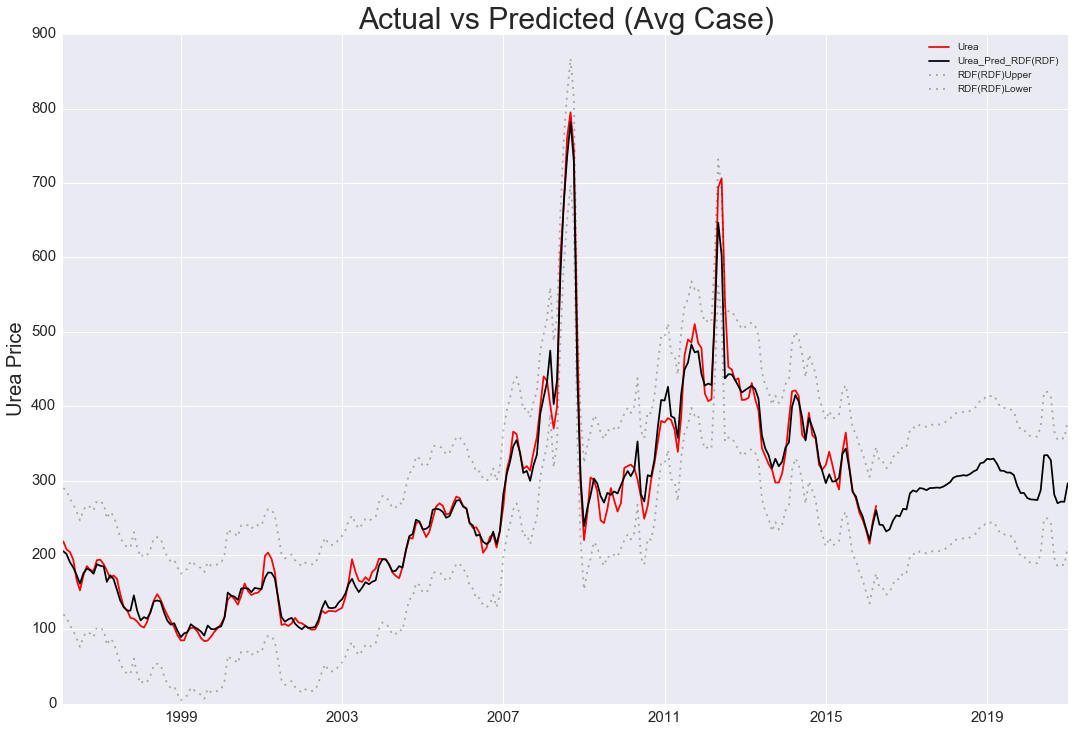

In [47]:
#looking at actual vs predicted monthly
import matplotlib.pyplot as plt
%matplotlib inline

x = (df['Monthly_Date'])
x_pred = (df['Monthly_Date'][243:])
y1 = (df['Urea'])
y2 = (df['Urea_Pred_MLR(MLR)'])
y3 = (df['Urea_Pred_MLR(RDF)'])
y4 = (df['Urea_Pred_RDF(MLR)'][243:])
y5 = (df['Urea_Pred_RDF(RDF)'])
y6 = (df['MLR(MLR)Upper'])
y7 = (df['MLR(MLR)Lower'])
y8 = (df['MLR(RDF)Upper'])
y9 = (df['MLR(RDF)Lower'])
y10 = (df['RDF(MLR)Upper'][243:])
y11 = (df['RDF(MLR)Lower'][243:])
y12 = (df['RDF(RDF)Upper'])
y13 = (df['RDF(RDF)Lower'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'r')
#ax.plot(x,y2,'g')
#ax.plot(x,y3,'b')
#ax.plot(x_pred,y4,'m')
ax.plot(x,y5,'k')
#ax.plot(x,y6,'g--',dashes=(2,5),alpha=0.3)
#ax.plot(x,y7,'g--',dashes=(2,5),alpha=0.3)
#ax.plot(x,y8,'b--',dashes=(2,5),alpha=0.3)
#ax.plot(x,y9,'b--',dashes=(2,5),alpha=0.3)
#ax.plot(x_pred,y10,'m--',dashes=(2,5),alpha=0.3)
#ax.plot(x_pred,y11,'m--',dashes=(2,5),alpha=0.3)
ax.plot(x,y12,'k--',dashes=(2,5),alpha=0.3)
ax.plot(x,y13,'k--',dashes=(2,5),alpha=0.3)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted (Avg Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea Price',size=(20))

plt.show()

In [48]:
#now daily so not as smooth, but first find new std dev of all predicted models
#std dev of each of the different models
MLRMLR_upper2 = combined['Urea_Pred_MLR(MLR)'] + combined['Urea_Pred_MLR(MLR)'].std()
combined['MLR(MLR)Upper'] = MLRMLR_upper2
MLRMLR_lower2 = combined['Urea_Pred_MLR(MLR)'] - combined['Urea_Pred_MLR(MLR)'].std()
combined['MLR(MLR)Lower'] = MLRMLR_lower2

MLRRDF_upper2 = combined['Urea_Pred_MLR(RDF)'] + combined['Urea_Pred_MLR(RDF)'].std()
combined['MLR(RDF)Upper'] = MLRRDF_upper2
MLRRDF_lower2 = combined['Urea_Pred_MLR(RDF)'] - combined['Urea_Pred_MLR(RDF)'].std()
combined['MLR(RDF)Lower'] = MLRRDF_lower2

RDFMLR_upper2 = combined['Urea_Pred_RDF(MLR)'] + combined['Urea_Pred_RDF(MLR)'].std()
combined['RDF(MLR)Upper'] = RDFMLR_upper2
RDFMLR_lower2 = combined['Urea_Pred_RDF(MLR)'] - combined['Urea_Pred_RDF(MLR)'].std()
combined['RDF(MLR)Lower'] = RDFMLR_lower2

RDFRDF_upper2 = combined['Urea_Pred_RDF(RDF)'] + combined['Urea_Pred_RDF(RDF)'].std()
combined['RDF(RDF)Upper'] = RDFRDF_upper2
RDFRDF_lower2 = combined['Urea_Pred_RDF(RDF)'] - combined['Urea_Pred_RDF(RDF)'].std()
combined['RDF(RDF)Lower'] = RDFRDF_lower2


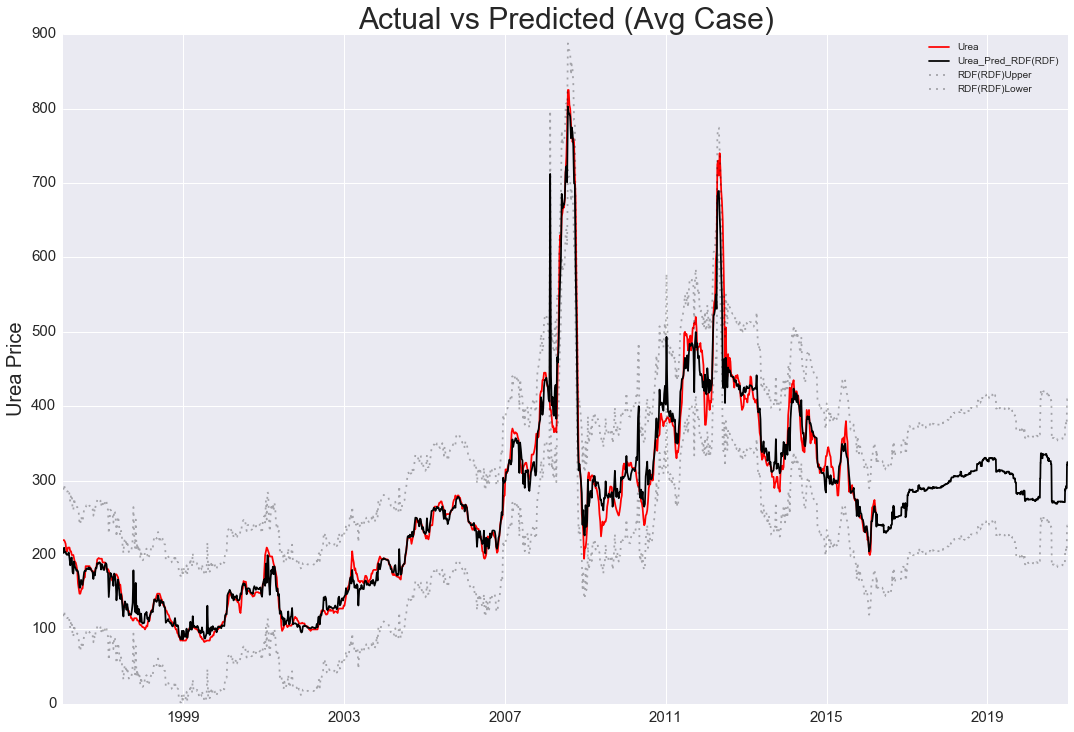

In [55]:
#looking at daily actual vs predicted
x = (combined['Date'])
x_pred = (combined['Date'][1056:])
y1 = (combined['Urea'])
y2 = (combined['Urea_Pred_MLR(MLR)'])
y3 = (combined['Urea_Pred_MLR(RDF)'])
y4 = (combined['Urea_Pred_RDF(MLR)'][1056:])
y5 = (combined['Urea_Pred_RDF(RDF)'])
y6 = (combined['MLR(MLR)Upper'])
y7 = (combined['MLR(MLR)Lower'])
y8 = (combined['MLR(RDF)Upper'])
y9 = (combined['MLR(RDF)Lower'])
y10 = (combined['RDF(MLR)Upper'][1056:])
y11 = (combined['RDF(MLR)Lower'][1056:])
y12 = (combined['RDF(RDF)Upper'])
y13 = (combined['RDF(RDF)Lower'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'r')
#ax.plot(x,y2,'g')
#ax.plot(x,y3,'b')
#ax.plot(x_pred,y4,'m')
ax.plot(x,y5,'k')
#ax.plot(x,y6,'g--',dashes=(2,5),alpha=0.3)
#ax.plot(x,y7,'g--',dashes=(2,5),alpha=0.3)
#ax.plot(x,y8,'b--',dashes=(2,5),alpha=0.3)
#ax.plot(x,y9,'b--',dashes=(2,5),alpha=0.3)
#ax.plot(x_pred,y10,'m--',dashes=(2,5),alpha=0.3)
#ax.plot(x_pred,y11,'m--',dashes=(2,5),alpha=0.3)
ax.plot(x,y12,'k--',dashes=(2,5),alpha=0.3)
ax.plot(x,y13,'k--',dashes=(2,5),alpha=0.3)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted (Avg Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea Price',size=(20))
plt.show()

# Urea Model Best Case
[Top](#table-of-contents)

In [3]:
import pandas as pd
data = pd.read_csv("C:/Users/msteinme/Documents/ureamarchupdatebest2.csv")
df_96on = data[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea']][0:1056]
df_96on.tail()

,Date,Crude,Corn,Coal_RDF(MLR),Coal_RDF(RDF),Urea
1051,2/26/2016,34.58,359.50,50.45,50.45,265
1052,3/4/2016,37.75,358.25,51.00,51.00,270
1053,3/11/2016,40.09,365.00,51.50,51.50,274
1054,3/18/2016,41.14,371.75,52.20,52.20,265
1055,3/25/2016,40.63,374.50,51.75,51.75,255


In [4]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

Date             datetime64[ns]
Crude                   float64
Corn                    float64
Coal_RDF(MLR)           float64
Coal_RDF(RDF)           float64
Urea                    float64
dtype: object

In [58]:
df_96on.describe()

,Crude,Corn,Coal_RDF(MLR),Coal_RDF(RDF),Urea
count,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,54.851648,361.660275,58.312026,58.312026,260.121212
std,31.319022,157.085607,33.658418,33.658418,135.997458
min,11.260000,182.500000,20.900000,20.900000,83.000000
25%,26.402500,231.000000,27.425593,27.425593,150.750000
50%,49.655000,322.750000,51.925000,51.925000,240.000000
75%,82.082500,425.562500,80.175000,80.175000,335.000000
max,145.860000,809.250000,192.500000,192.500000,825.000000


In [1]:
X = df_96on[['Crude','Corn','Coal_RDF(MLR)']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

NameError: name 'df_96on' is not defined

In [5]:
print(forest.predict([40.63,374.5,52.3]))
print(forest.predict([38.2,357.75,50.5]))
print(forest.predict([40.99,365,49.85]))
print(forest.predict([41.71,382,50.85]))
print(forest.predict([44.3,394.5,50.5]))

[ 257.30995364]
[ 250.09761485]
[ 251.58723371]
[ 253.10588636]
[ 244.32369535]


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single

In [6]:
#back in time machine (all different)
print(forest.predict([58.9,369.75,58.55]))
print(forest.predict([60.6,357.25,60.05]))
print(forest.predict([59.97,392.5,60.2]))
print(forest.predict([47.53,381.25,60.3]))
print(forest.predict([45.98,375,58.5]))
print(forest.predict([46.19,400.25,57.55]))
print(forest.predict([47.47,391.5,53.05]))
print(forest.predict([43.06,367.25,52.85]))
print(forest.predict([39.11,370.75,52.1]))
print(forest.predict([35.28,376.75,48.8]))
print(forest.predict([34.58,359.5,50.45]))
print(forest.predict([40.63,374.5,51.75]))

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single

[ 317.06503675]
[ 345.50608226]
[ 338.44596905]
[ 296.65908327]
[ 285.26057898]
[ 274.22149116]
[ 263.49111177]
[ 245.73104434]
[ 239.8655073]
[ 209.67744643]
[ 254.25296825]
[ 257.77498847]


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single

In [10]:
#back in time machine (crude change)
print(forest.predict([58.9,399,63.3]))
print(forest.predict([60.6,399,63.3]))
print(forest.predict([59.97,399,63.3]))
print(forest.predict([47.53,399,63.3]))
print(forest.predict([45.98,399,63.3]))
print(forest.predict([46.19,399,63.3]))
print(forest.predict([47.47,399,63.3]))
print(forest.predict([43.06,399,63.3]))
print(forest.predict([39.11,399,63.3]))
print(forest.predict([35.28,399,63.3]))
print(forest.predict([34.58,399,63.3]))
print(forest.predict([40.63,399,63.3]))

[ 304.38958285]
[ 309.17685074]
[ 308.61413422]
[ 299.45530023]
[ 274.06557679]
[ 275.88531933]
[ 299.45530023]
[ 262.96771555]
[ 232.61672706]

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single


[ 222.82292094]
[ 220.29417094]
[ 259.14767061]


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [11]:
#back in time machine (corn change)
print(forest.predict([50.5,369.75,63.3]))
print(forest.predict([50.5,357.25,63.3]))
print(forest.predict([50.5,392.5,63.3]))
print(forest.predict([50.5,381.25,63.3]))
print(forest.predict([50.5,375,63.3]))
print(forest.predict([50.5,400.25,63.3]))
print(forest.predict([50.5,391.5,63.3]))
print(forest.predict([50.5,367.25,63.3]))
print(forest.predict([50.5,370.75,63.3]))
print(forest.predict([50.5,376.75,63.3]))
print(forest.predict([50.5,359.5,63.3]))
print(forest.predict([50.5,374.5,63.3]))

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single

[ 299.00856396]
[ 298.45271574]
[ 301.91749917]
[ 298.54409007]
[ 298.68981481]
[ 301.65726042]
[ 300.85310979]
[ 299.21041055]
[ 298.93591134]
[ 298.72849521]
[ 299.42771574]
[ 298.80759045]


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single

In [12]:
#back in time machine (coal change)
print(forest.predict([50.5,399,58.55]))
print(forest.predict([50.5,399,60.05]))
print(forest.predict([50.5,399,60.2]))
print(forest.predict([50.5,399,60.3]))
print(forest.predict([50.5,399,58.5]))
print(forest.predict([50.5,399,57.55]))
print(forest.predict([50.5,399,53.05]))
print(forest.predict([50.5,399,52.85]))
print(forest.predict([50.5,399,52.1]))
print(forest.predict([50.5,399,48.8]))
print(forest.predict([50.5,399,50.45]))
print(forest.predict([50.5,399,51.75]))

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single

[ 303.26864651]
[ 310.36908778]
[ 311.76533778]
[ 310.18142639]
[ 303.26864651]
[ 300.56432526]
[ 279.73295018]
[ 278.92003351]
[ 280.82540136]
[ 258.2842578]
[ 258.9012578]
[ 282.12815759]


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single

In [8]:
print(forest.predict([50.5,399,63.3]))
print(forest.predict([50.5,399,63.3]))
print(forest.predict([50.5,399,63.3]))
print(forest.predict([50.5,399,63.3]))

[ 301.65726042]
[ 301.65726042]
[ 301.65726042]
[ 301.65726042]


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single

In [60]:
#comparing the different models
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
df_96on['Urea_Pred_RDF(MLR)'] = urea_predicted3
rdf_error3 = (abs(df_96on['Urea_Pred_RDF(MLR)'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_Top3_Error(MLR)'] = rdf_error3

urea_predicted4 = forest.predict(X)
urea_predicted4 = pd.DataFrame(urea_predicted4)
df_96on['Urea_Pred_RDF(RDF)'] = urea_predicted4
rdf_error4 = (abs(df_96on['Urea_Pred_RDF(RDF)'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_Top3_Error(MLR)'] = rdf_error4

mlrtop3_predicted = 22.1189 + (df_96on['Crude']*1.6519) + (df_96on['Corn']*0.1466) + (df_96on['Coal_RDF(MLR)']*1.6182) 
df_96on['Urea_Pred_MLR(MLR)'] = mlrtop3_predicted
mlrtop3_error = (abs(df_96on['Urea_Pred_MLR(MLR)'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Error(MLR)'] = mlrtop3_error

mlrtop3_predicted2 = 22.1189 + (df_96on['Crude']*1.6519) + (df_96on['Corn']*0.1466) + (df_96on['Coal_RDF(RDF)']*1.6182) 
df_96on['Urea_Pred_MLR(RDF)'] = mlrtop3_predicted2
mlrtop3_error2 = (abs(df_96on['Urea_Pred_MLR(RDF)'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Error(RDF)'] = mlrtop3_error2

print("Average RDF(MLR) error is: %.3f" % (rdf_error3.mean())) 
print("Average RDF(RDF) error is: %.3f" % (rdf_error4.mean()))
print("Average MLR(MLR) Top3 error is: %.3f" % (mlrtop3_error.mean()))
print("Average MLR(RDF) Top3 error is: %.3f" % (mlrtop3_error2.mean()))

df_96on

Average RDF(MLR) error is: 5.305
Average RDF(RDF) error is: 5.305
Average MLR(MLR) Top3 error is: 16.762
Average MLR(RDF) Top3 error is: 16.762


,Date,Crude,Corn,Coal_RDF(MLR),Coal_RDF(RDF),Urea,Urea_Pred_RDF(MLR),RDF_Top3_Error(MLR),Urea_Pred_RDF(RDF),Urea_Pred_MLR(MLR),MLR_Error(MLR),Urea_Pred_MLR(RDF),MLR_Error(RDF)
0,1996-01-05,19.65,369.75,25.358912,25.358912,220,204.601664,6.999244,204.601664,149.819876,31.900057,149.819876,31.900057
1,1996-01-12,17.98,366.25,25.269689,25.269689,220,210.610000,4.268182,210.610000,146.403722,33.452854,146.403722,33.452854
2,1996-01-19,18.25,365.00,29.070713,29.070713,218,205.388147,5.785254,205.388147,152.817303,29.900320,152.817303,29.900320
3,1996-01-26,17.36,360.25,29.195096,29.195096,215,203.482314,5.357063,203.482314,150.852038,29.836261,150.852038,29.836261
4,1996-02-02,17.38,370.50,32.105527,32.105527,205,201.184272,1.861331,201.184272,157.097386,23.367129,157.097386,23.367129
5,1996-02-09,17.38,367.25,28.667889,28.667889,205,199.950022,2.463404,199.950022,151.058149,26.313098,151.058149,26.313098
6,1996-02-16,18.40,382.75,28.169393,28.169393,210,203.568022,3.062847,203.568022,154.208722,26.567275,154.208722,26.567275
7,1996-02-23,18.45,383.50,28.828182,28.828182,210,206.008022,1.900942,206.008022,155.467319,25.967943,155.467319,25.967943
8,1996-03-01,18.62,386.75,27.863549,27.863549,210,196.653022,6.355704,196.653022,154.663623,26.350656,154.663623,26.350656
9,1996-03-08,18.87,388.50,26.513218,26.513218,205,187.926250,8.328659,187.926250,153.148042,25.293638,153.148042,25.293638


In [64]:
newpred2 = data [['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)']][1056:]
newpred = data [['Crude','Corn','Coal_RDF(MLR)']][1056:]
newpred3 = data[['Crude','Corn','Coal_RDF(RDF)']][1056:]

In [65]:
#new predictions
X = df_96on[['Crude','Corn','Coal_RDF(MLR)']].values #coal_rdf(rdf) same as the mlr one but not later on in predicted sec
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)']
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Urea_Pred_RDF(MLR)'] = df_new_pred

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 240.345, test: 1302.544
R^2 train: 0.988, test: 0.915
[ 0.60230513  0.09111678  0.30657808]


,Date,Crude,Corn,Coal_RDF(MLR),Coal_RDF(RDF),Urea_Pred_RDF(MLR)
0,2016-03-26,40.63,374.5,52.5251,52.5343,252.685527
1,2016-03-27,40.63,374.5,52.5251,52.5343,252.685527
2,2016-03-28,40.53,370.5,52.5421,53.4882,254.107874
3,2016-03-29,39.51,373,52.9604,53.832,235.129287
4,2016-03-30,39.66,367,53.1038,53.6404,242.853686
5,2016-03-31,39.36,351.5,53.451,55.4772,245.771495
6,2016-04-01,42.1429,378.5,52.6725,53.6984,251.765322
7,2016-04-02,42.2857,378.85,52.6725,53.6984,251.465322
8,2016-04-03,42.4286,379.2,52.7715,53.6984,251.358655
9,2016-04-04,42.5714,379.55,52.9354,53.832,245.735911


In [66]:
X = df_96on[['Crude','Corn','Coal_RDF(RDF)']].values #coal_rdf(rdf) same as the mlr one but not later on in predicted sec
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
newpred_predicted2 = forest.predict(newpred3)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred2['Urea_Pred_RDF(RDF)'] = df_new_pred2

mlrtop3_predicted5 = 22.1189 + (newpred2['Crude']*1.6519) + (newpred2['Corn']*0.1466) + (newpred2['Coal_RDF(MLR)']*1.6182) 
newpred2['Urea_Pred_MLR(MLR)'] = mlrtop3_predicted5

mlrtop3_predicted6 = 22.1189 + (newpred2['Crude']*1.6519) + (newpred2['Corn']*0.1466) + (newpred2['Coal_RDF(RDF)']*1.6182) 
newpred2['Urea_Pred_MLR(RDF)'] = mlrtop3_predicted6

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 266.111, test: 1320.126
R^2 train: 0.987, test: 0.914
[ 0.58214066  0.09508398  0.32277536]


,Date,Crude,Corn,Coal_RDF(MLR),Coal_RDF(RDF),Urea_Pred_RDF(MLR),Urea_Pred_RDF(RDF),Urea_Pred_MLR(MLR),Urea_Pred_MLR(RDF)
0,2016-03-26,40.63,374.5,52.5251,52.5343,252.685527,254.169620,229.133,229.148
1,2016-03-27,40.63,374.5,52.5251,52.5343,252.685527,254.169620,229.133,229.148
2,2016-03-28,40.53,370.5,52.5421,53.4882,254.107874,250.001796,228.409,229.94
3,2016-03-29,39.51,373,52.9604,53.832,235.129287,237.614812,227.768,229.178
4,2016-03-30,39.66,367,53.1038,53.6404,242.853686,242.061645,227.368,228.236
5,2016-03-31,39.36,351.5,53.451,55.4772,245.771495,255.882679,225.162,228.441
6,2016-04-01,42.1429,378.5,52.6725,53.6984,251.765322,250.704759,232.458,234.118
7,2016-04-02,42.2857,378.85,52.6725,53.6984,251.465322,250.969759,232.745,234.405
8,2016-04-03,42.4286,379.2,52.7715,53.6984,251.358655,250.969759,233.192,234.692
9,2016-04-04,42.5714,379.55,52.9354,53.832,245.735911,251.376634,233.745,235.196


In [67]:
frames = [df_96on,newpred2]
combined = pd.concat(frames)
combined

,Coal_RDF(MLR),Coal_RDF(RDF),Corn,Crude,Date,MLR_Error(MLR),MLR_Error(RDF),RDF_Top3_Error(MLR),Urea,Urea_Pred_MLR(MLR),Urea_Pred_MLR(RDF),Urea_Pred_RDF(MLR),Urea_Pred_RDF(RDF)
0,25.3589,25.3589,369.75,19.65,1996-01-05,31.900057,31.900057,6.999244,220,149.82,149.82,204.601664,204.601664
1,25.2697,25.2697,366.25,17.98,1996-01-12,33.452854,33.452854,4.268182,220,146.404,146.404,210.610000,210.610000
2,29.0707,29.0707,365,18.25,1996-01-19,29.900320,29.900320,5.785254,218,152.817,152.817,205.388147,205.388147
3,29.1951,29.1951,360.25,17.36,1996-01-26,29.836261,29.836261,5.357063,215,150.852,150.852,203.482314,203.482314
4,32.1055,32.1055,370.5,17.38,1996-02-02,23.367129,23.367129,1.861331,205,157.097,157.097,201.184272,201.184272
5,28.6679,28.6679,367.25,17.38,1996-02-09,26.313098,26.313098,2.463404,205,151.058,151.058,199.950022,199.950022
6,28.1694,28.1694,382.75,18.4,1996-02-16,26.567275,26.567275,3.062847,210,154.209,154.209,203.568022,203.568022
7,28.8282,28.8282,383.5,18.45,1996-02-23,25.967943,25.967943,1.900942,210,155.467,155.467,206.008022,206.008022
8,27.8635,27.8635,386.75,18.62,1996-03-01,26.350656,26.350656,6.355704,210,154.664,154.664,196.653022,196.653022
9,26.5132,26.5132,388.5,18.87,1996-03-08,25.293638,25.293638,8.328659,205,153.148,153.148,187.926250,187.926250


In [261]:
combined.to_csv("C:/Users/msteinme/Documents/ureabestmarch2.csv")

In [68]:
#want to have obs continue from 0
combined = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']
combined

,Date,Crude,Corn,Coal_RDF(MLR),Coal_RDF(RDF),Urea,Urea_Pred_MLR(MLR),Urea_Pred_MLR(RDF),Urea_Pred_RDF(MLR),Urea_Pred_RDF(RDF)
0,1996-01-05 00:00:00,19.65,369.75,25.3589,25.3589,220,149.82,149.82,204.602,204.602
1,1996-01-12 00:00:00,17.98,366.25,25.2697,25.2697,220,146.404,146.404,210.61,210.61
2,1996-01-19 00:00:00,18.25,365,29.0707,29.0707,218,152.817,152.817,205.388,205.388
3,1996-01-26 00:00:00,17.36,360.25,29.1951,29.1951,215,150.852,150.852,203.482,203.482
4,1996-02-02 00:00:00,17.38,370.5,32.1055,32.1055,205,157.097,157.097,201.184,201.184
5,1996-02-09 00:00:00,17.38,367.25,28.6679,28.6679,205,151.058,151.058,199.95,199.95
6,1996-02-16 00:00:00,18.4,382.75,28.1694,28.1694,210,154.209,154.209,203.568,203.568
7,1996-02-23 00:00:00,18.45,383.5,28.8282,28.8282,210,155.467,155.467,206.008,206.008
8,1996-03-01 00:00:00,18.62,386.75,27.8635,27.8635,210,154.664,154.664,196.653,196.653
9,1996-03-08 00:00:00,18.87,388.5,26.5132,26.5132,205,153.148,153.148,187.926,187.926


In [69]:
#monthly predictions this model is not 2 months in advance
jan_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][0:4]
feb_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][4:8]
mar_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][8:13]
apr_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][13:17]
may_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][17:22]
jun_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][22:26]
jul_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][26:30]
aug_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][30:35]
sep_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][35:39]
oct_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][39:43]
nov_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][43:48]
dec_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][48:52]
jan_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][52:57]
feb_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][57:61]
mar_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][61:65]
apr_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][65:69]
may_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][69:74]
jun_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][74:78]
jul_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][78:82]
aug_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][82:87]
sep_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][87:91]
oct_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][91:96]
nov_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][96:100]
dec_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][100:104]
jan_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][104:109]
feb_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][109:113]
mar_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][113:117]
apr_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][117:121]
may_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][121:126]
jun_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][126:130]
jul_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][130:135]
aug_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][135:139]
sep_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][139:143]
oct_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][143:148]
nov_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][148:152]
dec_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][152:156]
jan_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][156:161]
feb_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][161:165]
mar_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][165:169]
apr_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][169:174]
may_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][174:178]
jun_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][178:182]
jul_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][182:187]
aug_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][187:191]
sep_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][191:195]
oct_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][195:200]
nov_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][200:204]
dec_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][204:209]
jan_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][209:213]
feb_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][213:217]
mar_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][217:222]
apr_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][222:226]
may_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][226:230]
jun_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][230:235]
jul_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][235:239]
aug_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][239:243]
sep_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][243:248]
oct_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][248:252]
nov_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][252:256]
dec_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][256:261]
jan_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][261:265]
feb_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][265:269]
mar_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][269:274]
apr_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][274:278]
may_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][278:282]
jun_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][282:287]
jul_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][287:291]
aug_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][291:296]
sep_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][296:300]
oct_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][300:304]
nov_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][304:309]
dec_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][309:313]
jan_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][313:317]
feb_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][317:321]
mar_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][321:326]
apr_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][326:330]
may_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][330:335]
jun_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][335:339]
jul_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][339:343]
aug_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][343:348]
sep_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][348:352]
oct_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][352:356]
nov_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][356:361]
dec_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][361:365]
jan_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][365:370]
feb_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][370:374]
mar_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][374:378]
apr_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][378:382]
may_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][382:387]
jun_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][387:391]
jul_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][391:395]
aug_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][395:400]
sep_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][400:404]
oct_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][404:409]
nov_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][409:413]
dec_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][413:417]
jan_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][417:422]
feb_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][422:426]
mar_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][426:430]
apr_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][430:435]
may_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][435:439]
jun_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][439:443]
jul_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][443:448]
aug_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][448:452]
sep_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][452:456]
oct_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][456:461]
nov_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][461:465]
dec_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][465:470]
jan_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][470:474]
feb_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][474:478]
mar_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][478:482]
apr_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][482:487]
may_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][487:491]
jun_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][491:495]
jul_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][495:500]
aug_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][500:504]
sep_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][504:509]
oct_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][509:513]
nov_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][513:517]
dec_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][517:522]
jan_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][522:526]
feb_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][526:530]
mar_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][530:535]
apr_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][535:539]
may_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][539:543]
jun_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][543:548]
jul_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][548:552]
aug_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][552:556]
sep_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][556:561]
oct_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][561:565]
nov_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][565:569]
dec_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][569:574]
jan_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][574:578]
feb_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][578:582]
mar_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][582:587]
apr_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][587:591]
may_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][591:595]
jun_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][595:600]
jul_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][600:604]
aug_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][604:609]
sep_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][609:613]
oct_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][613:617]
nov_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][617:622]
dec_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][622:626]
jan_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][626:630]
feb_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][630:635]
mar_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][635:639]
apr_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][639:643]
may_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][643:648]
jun_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][648:652]
jul_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][652:656]
aug_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][656:661]
sep_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][661:665]
oct_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][665:670]
nov_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][670:674]
dec_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][674:678]
jan_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][678:683]
feb_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][683:687]
mar_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][687:691]
apr_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][691:695]
may_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][695:700]
jun_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][700:704]
jul_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][704:709]
aug_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][709:713]
sep_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][713:717]
oct_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][717:722]
nov_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][722:726]
dec_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][726:730]
jan_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][730:735]
feb_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][735:739]
mar_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][739:743]
apr_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][743:748]
may_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][748:752]
jun_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][752:756]
jul_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][756:761]
aug_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][761:765]
sep_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][765:769]
oct_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][769:774]
nov_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][774:778]
dec_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][778:783]
jan_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][783:787]
feb_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][787:791]
mar_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][791:795]
apr_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][795:800]
may_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][800:804]
jun_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][804:808]
jul_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][808:813]
aug_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][813:817]
sep_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][817:822]
oct_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][822:826]
nov_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][826:830]
dec_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][830:835]
jan_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][835:839]
feb_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][839:843]
mar_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][843:848]
apr_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][848:852]
may_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][852:856]
jun_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][856:861]
jul_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][861:865]
aug_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][865:870]
sep_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][870:874]
oct_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][874:878]
nov_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][878:883]
dec_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][883:887]
jan_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][887:891]
feb_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][891:895]
mar_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][895:900]
apr_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][900:904]
may_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][904:909]
jun_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][909:913]
jul_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][913:917]
aug_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][917:922]
sep_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][922:926]
oct_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][926:930]
nov_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][930:935]
dec_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][935:939]
jan_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][939:944]
feb_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][944:948]
mar_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][948:952]
apr_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][952:956]
may_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][956:961]
jun_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][961:965]
jul_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][965:969]
aug_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][969:974]
sep_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][974:978]
oct_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][978:983]
nov_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][983:987]
dec_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][987:991]
jan_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][991:996]
feb_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][996:1000]
mar_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1000:1004]
apr_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1004:1008]
may_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1008:1013]
jun_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1013:1017]
jul_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1017:1022]
aug_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1022:1026]
sep_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1026:1030]
oct_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1030:1035]
nov_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1035:1039]
dec_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1039:1043]
jan_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1043:1048]
feb_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1048:1052]
mar_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1052:1056]
mar_16

,Date,Crude,Corn,Coal_RDF(MLR),Coal_RDF(RDF),Urea,Urea_Pred_MLR(MLR),Urea_Pred_MLR(RDF),Urea_Pred_RDF(MLR),Urea_Pred_RDF(RDF)
1052,2016-03-04 00:00:00,37.75,358.25,51,51,270,219.526,219.526,261.42,261.42
1053,2016-03-11 00:00:00,40.09,365,51.5,51.5,274,225.19,225.19,263.079,263.079
1054,2016-03-18 00:00:00,41.14,371.75,52.2,52.2,265,229.047,229.047,260.265,260.265
1055,2016-03-25 00:00:00,40.63,374.5,51.75,51.75,255,227.879,227.879,258.198,258.198


In [70]:
# predicted chunk
apr_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1062:1092]
may_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1092:1123]
jun_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1123:1153]
jul_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1153:1184]
aug_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1184:1215]
sep_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1215:1245]
oct_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1245:1276]
nov_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1276:1306]
dec_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1306:1337]
jan_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1337:1368]
feb_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1368:1396]
mar_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1396:1427]
apr_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1427:1457]
may_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1457:1488]
jun_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1488:1518]
jul_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1518:1549]
aug_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1549:1580]
sep_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1580:1610]
oct_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1610:1641]
nov_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1641:1671]
dec_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1671:1702]
jan_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1702:1733]
feb_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1733:1761]
mar_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1761:1792]
apr_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1792:1822]
may_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1822:1853]
jun_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1853:1883]
jul_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1883:1914]
aug_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1914:1945]
sep_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1945:1975]
oct_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1975:2006]
nov_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2006:2036]
dec_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2036:2067]
jan_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2067:2098]
feb_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2098:2126]
mar_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2126:2157]
apr_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2157:2187]
may_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2187:2218]
jun_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2218:2248]
jul_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2248:2279]
aug_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2279:2310]
sep_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2310:2340]
oct_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2340:2371]
nov_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2371:2401]
dec_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2401:2432]
jan_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2432:2463]
feb_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2463:2492]
mar_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2492:2523]
apr_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2523:2553]
may_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2553:2584]
jun_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2584:2614]
jul_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2614:2645]
aug_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2645:2676]
sep_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2676:2706]
oct_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2706:2737]
nov_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2737:2767]
dec_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2767:2798]


In [71]:
mycolumns = ['Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']
df = pd.DataFrame(columns=mycolumns)
rows = [jan_96[mycolumns].mean(),feb_96[mycolumns].mean(),
        mar_96[mycolumns].mean(),apr_96[mycolumns].mean(),may_96[mycolumns].mean(),jun_96[mycolumns].mean(),
        jul_96[mycolumns].mean(),aug_96[mycolumns].mean(),sep_96[mycolumns].mean(),oct_96[mycolumns].mean(),nov_96[mycolumns].mean(),dec_96[mycolumns].mean(),
        jan_97[mycolumns].mean(),feb_97[mycolumns].mean(),mar_97[mycolumns].mean(),apr_97[mycolumns].mean(),may_97[mycolumns].mean(),jun_97[mycolumns].mean(),
        jul_97[mycolumns].mean(),aug_97[mycolumns].mean(),sep_97[mycolumns].mean(),oct_97[mycolumns].mean(),nov_97[mycolumns].mean(),dec_97[mycolumns].mean(),
        jan_98[mycolumns].mean(),feb_98[mycolumns].mean(),mar_98[mycolumns].mean(),apr_98[mycolumns].mean(),may_98[mycolumns].mean(),jun_98[mycolumns].mean(),
        jul_98[mycolumns].mean(),aug_98[mycolumns].mean(),sep_98[mycolumns].mean(),oct_98[mycolumns].mean(),nov_98[mycolumns].mean(),dec_98[mycolumns].mean(),
        jan_99[mycolumns].mean(),feb_99[mycolumns].mean(),mar_99[mycolumns].mean(),apr_99[mycolumns].mean(),may_99[mycolumns].mean(),jun_99[mycolumns].mean(),
        jul_99[mycolumns].mean(),aug_99[mycolumns].mean(),sep_99[mycolumns].mean(),oct_99[mycolumns].mean(),nov_99[mycolumns].mean(),dec_99[mycolumns].mean(),
        jan_00[mycolumns].mean(),feb_00[mycolumns].mean(),mar_00[mycolumns].mean(),apr_00[mycolumns].mean(),may_00[mycolumns].mean(),jun_00[mycolumns].mean(),
        jul_00[mycolumns].mean(),aug_00[mycolumns].mean(),sep_00[mycolumns].mean(),oct_00[mycolumns].mean(),nov_00[mycolumns].mean(),dec_00[mycolumns].mean(),
        jan_01[mycolumns].mean(),feb_01[mycolumns].mean(),mar_01[mycolumns].mean(),apr_01[mycolumns].mean(),may_01[mycolumns].mean(),jun_01[mycolumns].mean(),
        jul_01[mycolumns].mean(),aug_01[mycolumns].mean(),sep_01[mycolumns].mean(),oct_01[mycolumns].mean(),nov_01[mycolumns].mean(),dec_01[mycolumns].mean(),
        jan_02[mycolumns].mean(),feb_02[mycolumns].mean(),mar_02[mycolumns].mean(),apr_02[mycolumns].mean(),may_02[mycolumns].mean(),jun_02[mycolumns].mean(),
        jul_02[mycolumns].mean(),aug_02[mycolumns].mean(),sep_02[mycolumns].mean(),oct_02[mycolumns].mean(),nov_02[mycolumns].mean(),dec_02[mycolumns].mean(),
        jan_03[mycolumns].mean(),feb_03[mycolumns].mean(),mar_03[mycolumns].mean(),apr_03[mycolumns].mean(),may_03[mycolumns].mean(),jun_03[mycolumns].mean(),
        jul_03[mycolumns].mean(),aug_03[mycolumns].mean(),sep_03[mycolumns].mean(),oct_03[mycolumns].mean(),nov_03[mycolumns].mean(),dec_03[mycolumns].mean(),
        jan_04[mycolumns].mean(),feb_04[mycolumns].mean(),mar_04[mycolumns].mean(),apr_04[mycolumns].mean(),may_04[mycolumns].mean(),jun_04[mycolumns].mean(),
        jul_04[mycolumns].mean(),aug_04[mycolumns].mean(),sep_04[mycolumns].mean(),oct_04[mycolumns].mean(),nov_04[mycolumns].mean(),dec_04[mycolumns].mean(),
        jan_05[mycolumns].mean(),feb_05[mycolumns].mean(),mar_05[mycolumns].mean(),apr_05[mycolumns].mean(),may_05[mycolumns].mean(),jun_05[mycolumns].mean(),
        jul_05[mycolumns].mean(),aug_05[mycolumns].mean(),sep_05[mycolumns].mean(),oct_05[mycolumns].mean(),nov_05[mycolumns].mean(),dec_05[mycolumns].mean(),
        jan_06[mycolumns].mean(),feb_06[mycolumns].mean(),mar_06[mycolumns].mean(),apr_06[mycolumns].mean(),may_06[mycolumns].mean(),jun_06[mycolumns].mean(),
        jul_06[mycolumns].mean(),aug_06[mycolumns].mean(),sep_06[mycolumns].mean(),oct_06[mycolumns].mean(),nov_06[mycolumns].mean(),dec_06[mycolumns].mean(),
        jan_07[mycolumns].mean(),feb_07[mycolumns].mean(),mar_07[mycolumns].mean(),apr_07[mycolumns].mean(),may_07[mycolumns].mean(),jun_07[mycolumns].mean(),
        jul_07[mycolumns].mean(),aug_07[mycolumns].mean(),sep_07[mycolumns].mean(),oct_07[mycolumns].mean(),nov_07[mycolumns].mean(),dec_07[mycolumns].mean(),
        jan_08[mycolumns].mean(),feb_08[mycolumns].mean(),mar_08[mycolumns].mean(),apr_08[mycolumns].mean(),may_08[mycolumns].mean(),jun_08[mycolumns].mean(),
        jul_08[mycolumns].mean(),aug_08[mycolumns].mean(),sep_08[mycolumns].mean(),oct_08[mycolumns].mean(),nov_08[mycolumns].mean(),dec_08[mycolumns].mean(),
        jan_09[mycolumns].mean(),feb_09[mycolumns].mean(),mar_09[mycolumns].mean(),apr_09[mycolumns].mean(),may_09[mycolumns].mean(),jun_09[mycolumns].mean(),
        jul_09[mycolumns].mean(),aug_09[mycolumns].mean(),sep_09[mycolumns].mean(),oct_09[mycolumns].mean(),nov_09[mycolumns].mean(),dec_09[mycolumns].mean(),
        jan_10[mycolumns].mean(),feb_10[mycolumns].mean(),mar_10[mycolumns].mean(),apr_10[mycolumns].mean(),may_10[mycolumns].mean(),jun_10[mycolumns].mean(),
        jul_10[mycolumns].mean(),aug_10[mycolumns].mean(),sep_10[mycolumns].mean(),oct_10[mycolumns].mean(),nov_10[mycolumns].mean(),dec_10[mycolumns].mean(),
        jan_11[mycolumns].mean(),feb_11[mycolumns].mean(),mar_11[mycolumns].mean(),apr_11[mycolumns].mean(),may_11[mycolumns].mean(),jun_11[mycolumns].mean(),
        jul_11[mycolumns].mean(),aug_11[mycolumns].mean(),sep_11[mycolumns].mean(),oct_11[mycolumns].mean(),nov_11[mycolumns].mean(),dec_11[mycolumns].mean(),
        jan_12[mycolumns].mean(),feb_12[mycolumns].mean(),mar_12[mycolumns].mean(),apr_12[mycolumns].mean(),may_12[mycolumns].mean(),jun_12[mycolumns].mean(),
        jul_12[mycolumns].mean(),aug_12[mycolumns].mean(),sep_12[mycolumns].mean(),oct_12[mycolumns].mean(),nov_12[mycolumns].mean(),dec_12[mycolumns].mean(),
        jan_13[mycolumns].mean(),feb_13[mycolumns].mean(),mar_13[mycolumns].mean(),apr_13[mycolumns].mean(),may_13[mycolumns].mean(),jun_13[mycolumns].mean(),
        jul_13[mycolumns].mean(),aug_13[mycolumns].mean(),sep_13[mycolumns].mean(),oct_13[mycolumns].mean(),nov_13[mycolumns].mean(),dec_13[mycolumns].mean(),
        jan_14[mycolumns].mean(),feb_14[mycolumns].mean(),mar_14[mycolumns].mean(),apr_14[mycolumns].mean(),may_14[mycolumns].mean(),jun_14[mycolumns].mean(),
        jul_14[mycolumns].mean(),aug_14[mycolumns].mean(),sep_14[mycolumns].mean(),oct_14[mycolumns].mean(),nov_14[mycolumns].mean(),dec_14[mycolumns].mean(),
        jan_15[mycolumns].mean(),feb_15[mycolumns].mean(),mar_15[mycolumns].mean(),apr_15[mycolumns].mean(),may_15[mycolumns].mean(),jun_15[mycolumns].mean(),
        jul_15[mycolumns].mean(),aug_15[mycolumns].mean(),sep_15[mycolumns].mean(),oct_15[mycolumns].mean(),nov_15[mycolumns].mean(),dec_15[mycolumns].mean(),
        jan_16[mycolumns].mean(),feb_16[mycolumns].mean(),mar_16[mycolumns].mean(),apr_16[mycolumns].mean(),may_16[mycolumns].mean(),jun_16[mycolumns].mean(),
        jul_16[mycolumns].mean(),aug_16[mycolumns].mean(),sep_16[mycolumns].mean(),oct_16[mycolumns].mean(),nov_16[mycolumns].mean(),dec_16[mycolumns].mean(),
        jan_17[mycolumns].mean(),feb_17[mycolumns].mean(),mar_17[mycolumns].mean(),apr_17[mycolumns].mean(),may_17[mycolumns].mean(),jun_17[mycolumns].mean(),
        jul_17[mycolumns].mean(),aug_17[mycolumns].mean(),sep_17[mycolumns].mean(),oct_17[mycolumns].mean(),nov_17[mycolumns].mean(),dec_17[mycolumns].mean(),
        jan_18[mycolumns].mean(),feb_18[mycolumns].mean(),mar_18[mycolumns].mean(),apr_18[mycolumns].mean(),may_18[mycolumns].mean(),jun_18[mycolumns].mean(),
        jul_18[mycolumns].mean(),aug_18[mycolumns].mean(),sep_18[mycolumns].mean(),oct_18[mycolumns].mean(),nov_18[mycolumns].mean(),dec_18[mycolumns].mean(),
        jan_19[mycolumns].mean(),feb_19[mycolumns].mean(),mar_19[mycolumns].mean(),apr_19[mycolumns].mean(),may_19[mycolumns].mean(),jun_19[mycolumns].mean(),
        jul_19[mycolumns].mean(),aug_19[mycolumns].mean(),sep_19[mycolumns].mean(),oct_19[mycolumns].mean(),nov_19[mycolumns].mean(),dec_19[mycolumns].mean(),
        jan_20[mycolumns].mean(),feb_20[mycolumns].mean(),mar_20[mycolumns].mean(),apr_20[mycolumns].mean(),may_20[mycolumns].mean(),jun_20[mycolumns].mean(),
        jul_20[mycolumns].mean(),aug_20[mycolumns].mean(),sep_20[mycolumns].mean(),oct_20[mycolumns].mean(),nov_20[mycolumns].mean(),dec_20[mycolumns].mean()]
#puts each of those values for each of the rows
for row in rows:
    df.loc[len(df)] = row
df.tail()       

,Crude,Corn,Coal_RDF(MLR),Coal_RDF(RDF),Urea,Urea_Pred_MLR(MLR),Urea_Pred_MLR(RDF),Urea_Pred_RDF(MLR),Urea_Pred_RDF(RDF)
295,70.936986,500,69.617710,65.696614,NaN,325.255086,318.909968,315.313511,311.941618
296,71.062329,500,60.773187,60.916749,NaN,311.149932,311.382245,334.496834,313.698365
297,71.187671,500,54.163148,52.474836,NaN,300.660620,297.928593,352.342202,324.991011
298,71.313014,500,52.839649,52.044962,NaN,298.725987,297.440025,328.600242,322.440660
299,71.438356,500,51.875063,52.157542,NaN,297.372148,297.829255,318.343032,323.167147


In [72]:
#creating monthly dates in datetime form from 1/1996 to 2/2021
from datetime import datetime
rng2 = pd.date_range(start='1996-01-01', periods=302, freq='M')
rng2
rng2 = pd.DataFrame(rng2)
df['Monthly_Date']= rng2

In [73]:
df
print(df.dtypes)

Crude                        float64
Corn                         float64
Coal_RDF(MLR)                float64
Coal_RDF(RDF)                float64
Urea                         float64
Urea_Pred_MLR(MLR)           float64
Urea_Pred_MLR(RDF)           float64
Urea_Pred_RDF(MLR)           float64
Urea_Pred_RDF(RDF)           float64
Monthly_Date          datetime64[ns]
dtype: object


In [74]:
#std dev of each of the different models, monthly
MLRMLR_upper = df['Urea_Pred_MLR(MLR)'] + combined['Urea_Pred_MLR(MLR)'].std()
df['MLR(MLR)Upper'] = MLRMLR_upper
MLRMLR_lower = df['Urea_Pred_MLR(MLR)'] - combined['Urea_Pred_MLR(MLR)'].std()
df['MLR(MLR)Lower'] = MLRMLR_lower

MLRRDF_upper = df['Urea_Pred_MLR(RDF)'] + combined['Urea_Pred_MLR(RDF)'].std()
df['MLR(RDF)Upper'] = MLRRDF_upper
MLRRDF_lower = df['Urea_Pred_MLR(RDF)'] - combined['Urea_Pred_MLR(RDF)'].std()
df['MLR(RDF)Lower'] = MLRRDF_lower

RDFMLR_upper = df['Urea_Pred_RDF(MLR)'] + combined['Urea_Pred_RDF(MLR)'].std()
df['RDF(MLR)Upper'] = RDFMLR_upper
RDFMLR_lower = df['Urea_Pred_RDF(MLR)'] - combined['Urea_Pred_RDF(MLR)'].std()
df['RDF(MLR)Lower'] = RDFMLR_lower

RDFRDF_upper = df['Urea_Pred_RDF(RDF)'] + combined['Urea_Pred_RDF(RDF)'].std()
df['RDF(RDF)Upper'] = RDFRDF_upper
RDFRDF_lower = df['Urea_Pred_RDF(RDF)'] - combined['Urea_Pred_RDF(RDF)'].std()
df['RDF(RDF)Lower'] = RDFRDF_lower

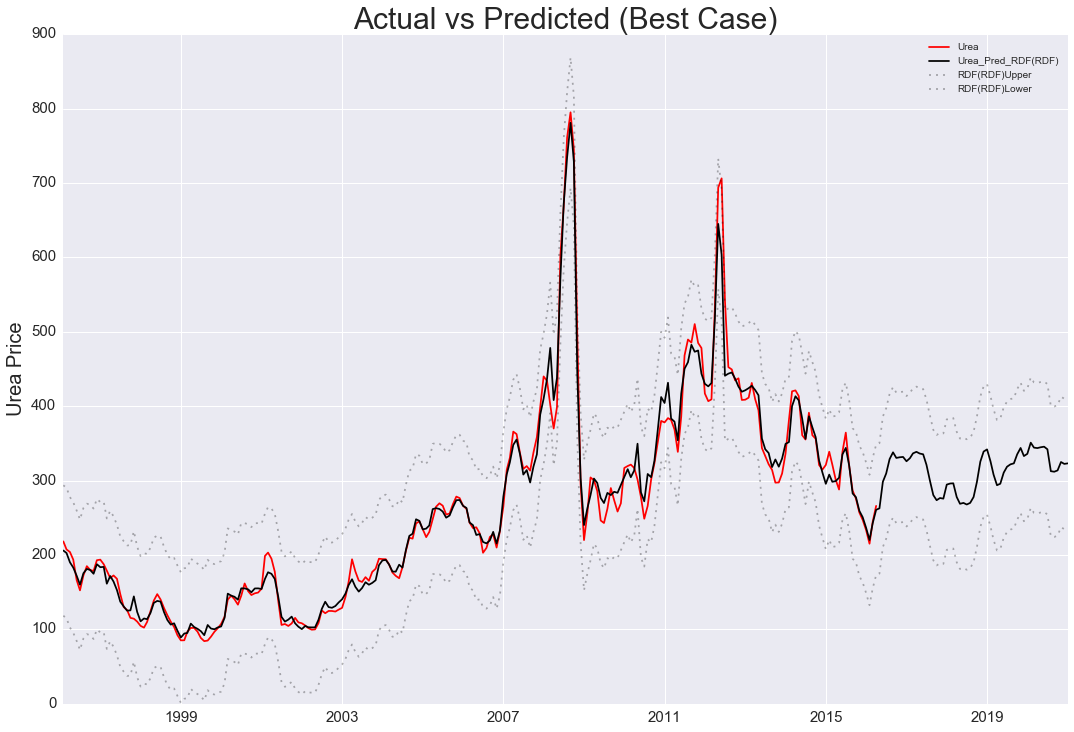

In [79]:
#looking at actual vs predicted monthly
import matplotlib.pyplot as plt
%matplotlib inline

x = (df['Monthly_Date'])
x_pred = (df['Monthly_Date'][243:])
y1 = (df['Urea'])
y2 = (df['Urea_Pred_MLR(MLR)'])
y3 = (df['Urea_Pred_MLR(RDF)'])
y4 = (df['Urea_Pred_RDF(MLR)'][243:])
y5 = (df['Urea_Pred_RDF(RDF)'])
y6 = (df['MLR(MLR)Upper'])
y7 = (df['MLR(MLR)Lower'])
y8 = (df['MLR(RDF)Upper'])
y9 = (df['MLR(RDF)Lower'])
y10 = (df['RDF(MLR)Upper'][243:])
y11 = (df['RDF(MLR)Lower'][243:])
y12 = (df['RDF(RDF)Upper'])
y13 = (df['RDF(RDF)Lower'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'r')
#ax.plot(x,y2,'g')
#ax.plot(x,y3,'b')
#ax.plot(x_pred,y4,'m')
ax.plot(x,y5,'k')
#ax.plot(x,y6,'g--',dashes=(2,5),alpha=0.3)
#ax.plot(x,y7,'g--',dashes=(2,5),alpha=0.3)
#ax.plot(x,y8,'b--',dashes=(2,5),alpha=0.3)
#ax.plot(x,y9,'b--',dashes=(2,5),alpha=0.3)
#ax.plot(x_pred,y10,'m--',dashes=(2,5),alpha=0.3)
#ax.plot(x_pred,y11,'m--',dashes=(2,5),alpha=0.3)
ax.plot(x,y12,'k--',dashes=(2,5),alpha=0.3)
ax.plot(x,y13,'k--',dashes=(2,5),alpha=0.3)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted (Best Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea Price',size=(20))
plt.show()

In [80]:
#now daily so not as smooth, but first find new std dev of all predicted models
#std dev of each of the different models
MLRMLR_upper2 = combined['Urea_Pred_MLR(MLR)'] + combined['Urea_Pred_MLR(MLR)'].std()
combined['MLR(MLR)Upper'] = MLRMLR_upper2
MLRMLR_lower2 = combined['Urea_Pred_MLR(MLR)'] - combined['Urea_Pred_MLR(MLR)'].std()
combined['MLR(MLR)Lower'] = MLRMLR_lower2

MLRRDF_upper2 = combined['Urea_Pred_MLR(RDF)'] + combined['Urea_Pred_MLR(RDF)'].std()
combined['MLR(RDF)Upper'] = MLRRDF_upper2
MLRRDF_lower2 = combined['Urea_Pred_MLR(RDF)'] - combined['Urea_Pred_MLR(RDF)'].std()
combined['MLR(RDF)Lower'] = MLRRDF_lower2

RDFMLR_upper2 = combined['Urea_Pred_RDF(MLR)'] + combined['Urea_Pred_RDF(MLR)'].std()
combined['RDF(MLR)Upper'] = RDFMLR_upper2
RDFMLR_lower2 = combined['Urea_Pred_RDF(MLR)'] - combined['Urea_Pred_RDF(MLR)'].std()
combined['RDF(MLR)Lower'] = RDFMLR_lower2

RDFRDF_upper2 = combined['Urea_Pred_RDF(RDF)'] + combined['Urea_Pred_RDF(RDF)'].std()
combined['RDF(RDF)Upper'] = RDFRDF_upper2
RDFRDF_lower2 = combined['Urea_Pred_RDF(RDF)'] - combined['Urea_Pred_RDF(RDF)'].std()
combined['RDF(RDF)Lower'] = RDFRDF_lower2

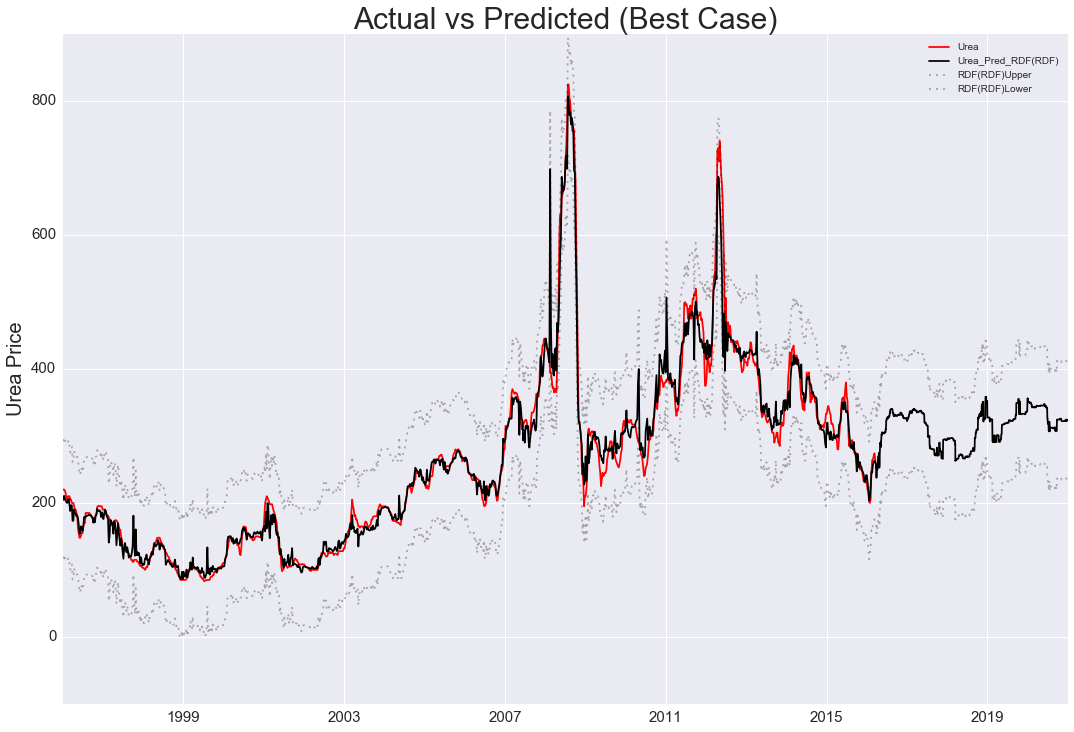

In [85]:
#looking at daily actual vs predicted
x = (combined['Date'])
x_pred = (combined['Date'][1056:])
y1 = (combined['Urea'])
y2 = (combined['Urea_Pred_MLR(MLR)'])
y3 = (combined['Urea_Pred_MLR(RDF)'])
y4 = (combined['Urea_Pred_RDF(MLR)'][1056:])
y5 = (combined['Urea_Pred_RDF(RDF)'])
y6 = (combined['MLR(MLR)Upper'])
y7 = (combined['MLR(MLR)Lower'])
y8 = (combined['MLR(RDF)Upper'])
y9 = (combined['MLR(RDF)Lower'])
y10 = (combined['RDF(MLR)Upper'][1056:])
y11 = (combined['RDF(MLR)Lower'][1056:])
y12 = (combined['RDF(RDF)Upper'])
y13 = (combined['RDF(RDF)Lower'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'r')
#ax.plot(x,y2,'g')
#ax.plot(x,y3,'b')
#ax.plot(x_pred,y4,'m')
ax.plot(x,y5,'k')
#ax.plot(x,y6,'g--',dashes=(2,5),alpha=0.3)
#ax.plot(x,y7,'g--',dashes=(2,5),alpha=0.3)
#ax.plot(x,y8,'b--',dashes=(2,5),alpha=0.3)
#ax.plot(x,y9,'b--',dashes=(2,5),alpha=0.3)
#ax.plot(x_pred,y10,'m--',dashes=(2,5),alpha=0.3)
#ax.plot(x_pred,y11,'m--',dashes=(2,5),alpha=0.3)
ax.plot(x,y12,'k--',dashes=(2,5),alpha=0.3)
ax.plot(x,y13,'k--',dashes=(2,5),alpha=0.3)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted (Best Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea Price',size=(20))
plt.show()

# Urea Model Worst Case
[Top](#table-of-contents)

In [86]:
data = pd.read_csv("C:/Users/msteinme/Documents/ureamarchupdateworst2.csv")
df_96on = data[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea']][0:1056]
df_96on.tail(2)

,Date,Crude,Corn,Coal_RDF(MLR),Coal_RDF(RDF),Urea
1054,3/18/2016,41.14,371.75,52.20,52.20,265
1055,3/25/2016,40.63,374.50,51.75,51.75,255


In [87]:
from datetime import datetime
df_96on['Date'] = pd.to_datetime(df_96on['Date'])
date = df_96on['Date']
df_96on.dtypes

Date             datetime64[ns]
Crude                   float64
Corn                    float64
Coal_RDF(MLR)           float64
Coal_RDF(RDF)           float64
Urea                    float64
dtype: object

In [88]:
df_96on.describe() #make sure both coal values the same 

,Crude,Corn,Coal_RDF(MLR),Coal_RDF(RDF),Urea
count,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,54.851648,361.660275,58.312026,58.312026,260.121212
std,31.319022,157.085607,33.658418,33.658418,135.997458
min,11.260000,182.500000,20.900000,20.900000,83.000000
25%,26.402500,231.000000,27.425593,27.425593,150.750000
50%,49.655000,322.750000,51.925000,51.925000,240.000000
75%,82.082500,425.562500,80.175000,80.175000,335.000000
max,145.860000,809.250000,192.500000,192.500000,825.000000


In [89]:
X = df_96on[['Crude','Corn','Coal_RDF(MLR)']].values
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

MSE train: 249.235, test: 1294.124
R^2 train: 0.987, test: 0.915
[ 0.61515805  0.09182643  0.29301553]


In [90]:
#comparing the different models
urea_predicted3 = forest.predict(X)
urea_predicted3 = pd.DataFrame(urea_predicted3)
df_96on['Urea_Pred_RDF(MLR)'] = urea_predicted3
rdf_error3 = (abs(df_96on['Urea_Pred_RDF(MLR)'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_Top3_Error(MLR)'] = rdf_error3

urea_predicted4 = forest.predict(X)
urea_predicted4 = pd.DataFrame(urea_predicted4)
df_96on['Urea_Pred_RDF(RDF)'] = urea_predicted4
rdf_error4 = (abs(df_96on['Urea_Pred_RDF(RDF)'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['RDF_Top3_Error(MLR)'] = rdf_error4

mlrtop3_predicted = 22.1189 + (df_96on['Crude']*1.6519) + (df_96on['Corn']*0.1466) + (df_96on['Coal_RDF(MLR)']*1.6182) 
df_96on['Urea_Pred_MLR(MLR)'] = mlrtop3_predicted
mlrtop3_error = (abs(df_96on['Urea_Pred_MLR(MLR)'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Error(MLR)'] = mlrtop3_error

mlrtop3_predicted2 = 22.1189 + (df_96on['Crude']*1.6519) + (df_96on['Corn']*0.1466) + (df_96on['Coal_RDF(RDF)']*1.6182) 
df_96on['Urea_Pred_MLR(RDF)'] = mlrtop3_predicted2
mlrtop3_error2 = (abs(df_96on['Urea_Pred_MLR(RDF)'] - df_96on['Urea'])/df_96on['Urea'])*100
df_96on['MLR_Error(RDF)'] = mlrtop3_error2

print("Average RDF(MLR) error is: %.3f" % (rdf_error3.mean())) 
print("Average RDF(RDF) error is: %.3f" % (rdf_error4.mean()))
print("Average MLR(MLR) Top3 error is: %.3f" % (mlrtop3_error.mean()))
print("Average MLR(RDF) Top3 error is: %.3f" % (mlrtop3_error2.mean()))

df_96on

Average RDF(MLR) error is: 5.299
Average RDF(RDF) error is: 5.299
Average MLR(MLR) Top3 error is: 16.762
Average MLR(RDF) Top3 error is: 16.762


,Date,Crude,Corn,Coal_RDF(MLR),Coal_RDF(RDF),Urea,Urea_Pred_RDF(MLR),RDF_Top3_Error(MLR),Urea_Pred_RDF(RDF),Urea_Pred_MLR(MLR),MLR_Error(MLR),Urea_Pred_MLR(RDF),MLR_Error(RDF)
0,1996-01-05,19.65,369.75,25.358912,25.358912,220,201.457232,8.428531,201.457232,149.819876,31.900057,149.819876,31.900057
1,1996-01-12,17.98,366.25,25.269689,25.269689,220,212.004091,3.634504,212.004091,146.403722,33.452854,146.403722,33.452854
2,1996-01-19,18.25,365.00,29.070713,29.070713,218,206.693194,5.186608,206.693194,152.817303,29.900320,152.817303,29.900320
3,1996-01-26,17.36,360.25,29.195096,29.195096,215,206.065694,4.155491,206.065694,150.852038,29.836261,150.852038,29.836261
4,1996-02-02,17.38,370.50,32.105527,32.105527,205,205.028819,0.014058,205.028819,157.097386,23.367129,157.097386,23.367129
5,1996-02-09,17.38,367.25,28.667889,28.667889,205,204.464028,0.261450,204.464028,151.058149,26.313098,151.058149,26.313098
6,1996-02-16,18.40,382.75,28.169393,28.169393,210,204.089792,2.814385,204.089792,154.208722,26.567275,154.208722,26.567275
7,1996-02-23,18.45,383.50,28.828182,28.828182,210,206.183542,1.817361,206.183542,155.467319,25.967943,155.467319,25.967943
8,1996-03-01,18.62,386.75,27.863549,27.863549,210,199.871042,4.823313,199.871042,154.663623,26.350656,154.663623,26.350656
9,1996-03-08,18.87,388.50,26.513218,26.513218,205,187.865237,8.358421,187.865237,153.148042,25.293638,153.148042,25.293638


In [91]:
newpred2 = data [['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)']][1056:]
newpred = data [['Crude','Corn','Coal_RDF(MLR)']][1056:]
newpred3 = data[['Crude','Corn','Coal_RDF(RDF)']][1056:]

In [92]:
#new predictions
X = df_96on[['Crude','Corn','Coal_RDF(MLR)']].values #coal_rdf(rdf) same as the mlr one but not later on in predicted sec
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)

newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)']
newpred_predicted = forest.predict(newpred)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Urea_Pred_RDF(MLR)'] = df_new_pred

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 245.415, test: 1280.397
R^2 train: 0.988, test: 0.916
[ 0.58562705  0.09318095  0.321192  ]


,Date,Crude,Corn,Coal_RDF(MLR),Coal_RDF(RDF),Urea_Pred_RDF(MLR)
0,2016-03-26,40.63,374.5,52.2853,52.5426,256.583404
1,2016-03-27,40.63,374.5,52.2853,52.5426,256.583404
2,2016-03-28,40.53,370.5,52.2865,53.7917,257.493791
3,2016-03-29,39.51,373,52.9085,54.9921,235.452291
4,2016-03-30,39.66,367,53.0801,55.0984,240.349250
5,2016-03-31,39.36,351.5,53.2868,58.1383,243.992106
6,2016-04-01,38.3,368.857,52.0718,52.3235,243.464061
7,2016-04-02,38.2,368.564,52.0718,52.2945,243.237609
8,2016-04-03,38.1,368.271,51.8318,52.2922,243.120892
9,2016-04-04,37.9,367.979,51.7373,52.3905,245.671059


In [93]:
X = df_96on[['Crude','Corn','Coal_RDF(RDF)']].values #coal_rdf(rdf) same as the mlr one but not later on in predicted sec
y = df_96on['Urea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))
print(forest.feature_importances_)
newpred_predicted2 = forest.predict(newpred3)
df_new_pred2 = pd.DataFrame(newpred_predicted2)
newpred2['Urea_Pred_RDF(RDF)'] = df_new_pred2

mlrtop3_predicted5 = 22.1189 + (newpred2['Crude']*1.6519) + (newpred2['Corn']*0.1466) + (newpred2['Coal_RDF(MLR)']*1.6182) 
newpred2['Urea_Pred_MLR(MLR)'] = mlrtop3_predicted5

mlrtop3_predicted6 = 22.1189 + (newpred2['Crude']*1.6519) + (newpred2['Corn']*0.1466) + (newpred2['Coal_RDF(RDF)']*1.6182) 
newpred2['Urea_Pred_MLR(RDF)'] = mlrtop3_predicted6

newpred2['Date'] = pd.to_datetime(newpred2['Date'])
newpred2

MSE train: 259.400, test: 1291.076
R^2 train: 0.987, test: 0.916
[ 0.60082607  0.10423312  0.29494081]


,Date,Crude,Corn,Coal_RDF(MLR),Coal_RDF(RDF),Urea_Pred_RDF(MLR),Urea_Pred_RDF(RDF),Urea_Pred_MLR(MLR),Urea_Pred_MLR(RDF)
0,2016-03-26,40.63,374.5,52.2853,52.5426,256.583404,252.351379,228.745,229.162
1,2016-03-27,40.63,374.5,52.2853,52.5426,256.583404,252.351379,228.745,229.162
2,2016-03-28,40.53,370.5,52.2865,53.7917,257.493791,251.839958,227.996,230.431
3,2016-03-29,39.51,373,52.9085,54.9921,235.452291,240.485460,227.684,231.056
4,2016-03-30,39.66,367,53.0801,55.0984,240.349250,246.707960,227.33,230.596
5,2016-03-31,39.36,351.5,53.2868,58.1383,243.992106,256.819260,224.896,232.747
6,2016-04-01,38.3,368.857,52.0718,52.3235,243.464061,241.964225,223.724,224.131
7,2016-04-02,38.2,368.564,52.0718,52.2945,243.237609,241.606725,223.516,223.876
8,2016-04-03,38.1,368.271,51.8318,52.2922,243.120892,241.786725,222.919,223.664
9,2016-04-04,37.9,367.979,51.7373,52.3905,245.671059,243.112050,222.393,223.45


In [94]:
frames = [df_96on,newpred2]
combined = pd.concat(frames)
combined

,Coal_RDF(MLR),Coal_RDF(RDF),Corn,Crude,Date,MLR_Error(MLR),MLR_Error(RDF),RDF_Top3_Error(MLR),Urea,Urea_Pred_MLR(MLR),Urea_Pred_MLR(RDF),Urea_Pred_RDF(MLR),Urea_Pred_RDF(RDF)
0,25.3589,25.3589,369.75,19.65,1996-01-05,31.900057,31.900057,8.428531,220,149.82,149.82,201.457232,201.457232
1,25.2697,25.2697,366.25,17.98,1996-01-12,33.452854,33.452854,3.634504,220,146.404,146.404,212.004091,212.004091
2,29.0707,29.0707,365,18.25,1996-01-19,29.900320,29.900320,5.186608,218,152.817,152.817,206.693194,206.693194
3,29.1951,29.1951,360.25,17.36,1996-01-26,29.836261,29.836261,4.155491,215,150.852,150.852,206.065694,206.065694
4,32.1055,32.1055,370.5,17.38,1996-02-02,23.367129,23.367129,0.014058,205,157.097,157.097,205.028819,205.028819
5,28.6679,28.6679,367.25,17.38,1996-02-09,26.313098,26.313098,0.261450,205,151.058,151.058,204.464028,204.464028
6,28.1694,28.1694,382.75,18.4,1996-02-16,26.567275,26.567275,2.814385,210,154.209,154.209,204.089792,204.089792
7,28.8282,28.8282,383.5,18.45,1996-02-23,25.967943,25.967943,1.817361,210,155.467,155.467,206.183542,206.183542
8,27.8635,27.8635,386.75,18.62,1996-03-01,26.350656,26.350656,4.823313,210,154.664,154.664,199.871042,199.871042
9,26.5132,26.5132,388.5,18.87,1996-03-08,25.293638,25.293638,8.358421,205,153.148,153.148,187.865237,187.865237


In [284]:
combined.to_csv("C:/Users/msteinme/Documents/ureaworstmarch2.csv")

In [95]:
#want to have obs continue from 0
combined = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']]
combined = np.array(combined)
combined = pd.DataFrame(combined)
combined.columns = ['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']
combined

,Date,Crude,Corn,Coal_RDF(MLR),Coal_RDF(RDF),Urea,Urea_Pred_MLR(MLR),Urea_Pred_MLR(RDF),Urea_Pred_RDF(MLR),Urea_Pred_RDF(RDF)
0,1996-01-05 00:00:00,19.65,369.75,25.3589,25.3589,220,149.82,149.82,201.457,201.457
1,1996-01-12 00:00:00,17.98,366.25,25.2697,25.2697,220,146.404,146.404,212.004,212.004
2,1996-01-19 00:00:00,18.25,365,29.0707,29.0707,218,152.817,152.817,206.693,206.693
3,1996-01-26 00:00:00,17.36,360.25,29.1951,29.1951,215,150.852,150.852,206.066,206.066
4,1996-02-02 00:00:00,17.38,370.5,32.1055,32.1055,205,157.097,157.097,205.029,205.029
5,1996-02-09 00:00:00,17.38,367.25,28.6679,28.6679,205,151.058,151.058,204.464,204.464
6,1996-02-16 00:00:00,18.4,382.75,28.1694,28.1694,210,154.209,154.209,204.09,204.09
7,1996-02-23 00:00:00,18.45,383.5,28.8282,28.8282,210,155.467,155.467,206.184,206.184
8,1996-03-01 00:00:00,18.62,386.75,27.8635,27.8635,210,154.664,154.664,199.871,199.871
9,1996-03-08 00:00:00,18.87,388.5,26.5132,26.5132,205,153.148,153.148,187.865,187.865


In [96]:
#monthly predictions this model is not 2 months in advance
jan_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][0:4]
feb_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][4:8]
mar_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][8:13]
apr_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][13:17]
may_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][17:22]
jun_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][22:26]
jul_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][26:30]
aug_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][30:35]
sep_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][35:39]
oct_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][39:43]
nov_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][43:48]
dec_96 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][48:52]
jan_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][52:57]
feb_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][57:61]
mar_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][61:65]
apr_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][65:69]
may_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][69:74]
jun_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][74:78]
jul_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][78:82]
aug_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][82:87]
sep_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][87:91]
oct_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][91:96]
nov_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][96:100]
dec_97 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][100:104]
jan_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][104:109]
feb_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][109:113]
mar_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][113:117]
apr_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][117:121]
may_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][121:126]
jun_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][126:130]
jul_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][130:135]
aug_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][135:139]
sep_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][139:143]
oct_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][143:148]
nov_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][148:152]
dec_98 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][152:156]
jan_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][156:161]
feb_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][161:165]
mar_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][165:169]
apr_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][169:174]
may_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][174:178]
jun_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][178:182]
jul_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][182:187]
aug_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][187:191]
sep_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][191:195]
oct_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][195:200]
nov_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][200:204]
dec_99 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][204:209]
jan_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][209:213]
feb_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][213:217]
mar_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][217:222]
apr_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][222:226]
may_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][226:230]
jun_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][230:235]
jul_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][235:239]
aug_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][239:243]
sep_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][243:248]
oct_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][248:252]
nov_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][252:256]
dec_00 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][256:261]
jan_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][261:265]
feb_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][265:269]
mar_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][269:274]
apr_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][274:278]
may_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][278:282]
jun_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][282:287]
jul_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][287:291]
aug_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][291:296]
sep_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][296:300]
oct_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][300:304]
nov_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][304:309]
dec_01 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][309:313]
jan_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][313:317]
feb_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][317:321]
mar_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][321:326]
apr_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][326:330]
may_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][330:335]
jun_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][335:339]
jul_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][339:343]
aug_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][343:348]
sep_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][348:352]
oct_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][352:356]
nov_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][356:361]
dec_02 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][361:365]
jan_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][365:370]
feb_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][370:374]
mar_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][374:378]
apr_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][378:382]
may_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][382:387]
jun_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][387:391]
jul_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][391:395]
aug_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][395:400]
sep_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][400:404]
oct_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][404:409]
nov_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][409:413]
dec_03 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][413:417]
jan_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][417:422]
feb_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][422:426]
mar_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][426:430]
apr_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][430:435]
may_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][435:439]
jun_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][439:443]
jul_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][443:448]
aug_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][448:452]
sep_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][452:456]
oct_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][456:461]
nov_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][461:465]
dec_04 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][465:470]
jan_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][470:474]
feb_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][474:478]
mar_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][478:482]
apr_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][482:487]
may_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][487:491]
jun_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][491:495]
jul_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][495:500]
aug_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][500:504]
sep_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][504:509]
oct_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][509:513]
nov_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][513:517]
dec_05 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][517:522]
jan_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][522:526]
feb_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][526:530]
mar_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][530:535]
apr_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][535:539]
may_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][539:543]
jun_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][543:548]
jul_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][548:552]
aug_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][552:556]
sep_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][556:561]
oct_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][561:565]
nov_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][565:569]
dec_06 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][569:574]
jan_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][574:578]
feb_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][578:582]
mar_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][582:587]
apr_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][587:591]
may_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][591:595]
jun_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][595:600]
jul_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][600:604]
aug_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][604:609]
sep_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][609:613]
oct_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][613:617]
nov_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][617:622]
dec_07 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][622:626]
jan_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][626:630]
feb_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][630:635]
mar_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][635:639]
apr_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][639:643]
may_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][643:648]
jun_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][648:652]
jul_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][652:656]
aug_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][656:661]
sep_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][661:665]
oct_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][665:670]
nov_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][670:674]
dec_08 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][674:678]
jan_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][678:683]
feb_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][683:687]
mar_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][687:691]
apr_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][691:695]
may_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][695:700]
jun_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][700:704]
jul_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][704:709]
aug_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][709:713]
sep_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][713:717]
oct_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][717:722]
nov_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][722:726]
dec_09 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][726:730]
jan_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][730:735]
feb_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][735:739]
mar_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][739:743]
apr_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][743:748]
may_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][748:752]
jun_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][752:756]
jul_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][756:761]
aug_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][761:765]
sep_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][765:769]
oct_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][769:774]
nov_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][774:778]
dec_10 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][778:783]
jan_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][783:787]
feb_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][787:791]
mar_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][791:795]
apr_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][795:800]
may_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][800:804]
jun_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][804:808]
jul_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][808:813]
aug_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][813:817]
sep_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][817:822]
oct_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][822:826]
nov_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][826:830]
dec_11 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][830:835]
jan_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][835:839]
feb_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][839:843]
mar_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][843:848]
apr_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][848:852]
may_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][852:856]
jun_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][856:861]
jul_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][861:865]
aug_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][865:870]
sep_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][870:874]
oct_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][874:878]
nov_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][878:883]
dec_12 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][883:887]
jan_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][887:891]
feb_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][891:895]
mar_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][895:900]
apr_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][900:904]
may_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][904:909]
jun_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][909:913]
jul_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][913:917]
aug_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][917:922]
sep_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][922:926]
oct_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][926:930]
nov_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][930:935]
dec_13 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][935:939]
jan_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][939:944]
feb_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][944:948]
mar_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][948:952]
apr_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][952:956]
may_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][956:961]
jun_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][961:965]
jul_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][965:969]
aug_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][969:974]
sep_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][974:978]
oct_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][978:983]
nov_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][983:987]
dec_14 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][987:991]
jan_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][991:996]
feb_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][996:1000]
mar_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1000:1004]
apr_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1004:1008]
may_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1008:1013]
jun_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1013:1017]
jul_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1017:1022]
aug_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1022:1026]
sep_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1026:1030]
oct_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1030:1035]
nov_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1035:1039]
dec_15 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1039:1043]
jan_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1043:1048]
feb_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1048:1052]
mar_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1052:1056]
mar_16

,Date,Crude,Corn,Coal_RDF(MLR),Coal_RDF(RDF),Urea,Urea_Pred_MLR(MLR),Urea_Pred_MLR(RDF),Urea_Pred_RDF(MLR),Urea_Pred_RDF(RDF)
1052,2016-03-04 00:00:00,37.75,358.25,51,51,270,219.526,219.526,258.413,258.413
1053,2016-03-11 00:00:00,40.09,365,51.5,51.5,274,225.19,225.19,263.935,263.935
1054,2016-03-18 00:00:00,41.14,371.75,52.2,52.2,265,229.047,229.047,259.405,259.405
1055,2016-03-25 00:00:00,40.63,374.5,51.75,51.75,255,227.879,227.879,258.426,258.426


In [97]:
# predicted chunk
apr_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1062:1092]
may_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1092:1123]
jun_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1123:1153]
jul_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1153:1184]
aug_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1184:1215]
sep_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1215:1245]
oct_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1245:1276]
nov_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1276:1306]
dec_16 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1306:1337]
jan_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1337:1368]
feb_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1368:1396]
mar_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1396:1427]
apr_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1427:1457]
may_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1457:1488]
jun_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1488:1518]
jul_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1518:1549]
aug_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1549:1580]
sep_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1580:1610]
oct_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1610:1641]
nov_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1641:1671]
dec_17 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1671:1702]
jan_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1702:1733]
feb_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1733:1761]
mar_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1761:1792]
apr_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1792:1822]
may_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1822:1853]
jun_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1853:1883]
jul_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1883:1914]
aug_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1914:1945]
sep_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1945:1975]
oct_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][1975:2006]
nov_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2006:2036]
dec_18 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2036:2067]
jan_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2067:2098]
feb_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2098:2126]
mar_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2126:2157]
apr_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2157:2187]
may_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2187:2218]
jun_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2218:2248]
jul_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2248:2279]
aug_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2279:2310]
sep_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2310:2340]
oct_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2340:2371]
nov_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2371:2401]
dec_19 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2401:2432]
jan_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2432:2463]
feb_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2463:2492]
mar_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2492:2523]
apr_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2523:2553]
may_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2553:2584]
jun_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2584:2614]
jul_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2614:2645]
aug_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2645:2676]
sep_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2676:2706]
oct_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2706:2737]
nov_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2737:2767]
dec_20 = combined[['Date','Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']][2767:2798]


In [98]:
mycolumns = ['Crude','Corn','Coal_RDF(MLR)','Coal_RDF(RDF)','Urea','Urea_Pred_MLR(MLR)','Urea_Pred_MLR(RDF)','Urea_Pred_RDF(MLR)','Urea_Pred_RDF(RDF)']
df = pd.DataFrame(columns=mycolumns)
rows = [jan_96[mycolumns].mean(),feb_96[mycolumns].mean(),
        mar_96[mycolumns].mean(),apr_96[mycolumns].mean(),may_96[mycolumns].mean(),jun_96[mycolumns].mean(),
        jul_96[mycolumns].mean(),aug_96[mycolumns].mean(),sep_96[mycolumns].mean(),oct_96[mycolumns].mean(),nov_96[mycolumns].mean(),dec_96[mycolumns].mean(),
        jan_97[mycolumns].mean(),feb_97[mycolumns].mean(),mar_97[mycolumns].mean(),apr_97[mycolumns].mean(),may_97[mycolumns].mean(),jun_97[mycolumns].mean(),
        jul_97[mycolumns].mean(),aug_97[mycolumns].mean(),sep_97[mycolumns].mean(),oct_97[mycolumns].mean(),nov_97[mycolumns].mean(),dec_97[mycolumns].mean(),
        jan_98[mycolumns].mean(),feb_98[mycolumns].mean(),mar_98[mycolumns].mean(),apr_98[mycolumns].mean(),may_98[mycolumns].mean(),jun_98[mycolumns].mean(),
        jul_98[mycolumns].mean(),aug_98[mycolumns].mean(),sep_98[mycolumns].mean(),oct_98[mycolumns].mean(),nov_98[mycolumns].mean(),dec_98[mycolumns].mean(),
        jan_99[mycolumns].mean(),feb_99[mycolumns].mean(),mar_99[mycolumns].mean(),apr_99[mycolumns].mean(),may_99[mycolumns].mean(),jun_99[mycolumns].mean(),
        jul_99[mycolumns].mean(),aug_99[mycolumns].mean(),sep_99[mycolumns].mean(),oct_99[mycolumns].mean(),nov_99[mycolumns].mean(),dec_99[mycolumns].mean(),
        jan_00[mycolumns].mean(),feb_00[mycolumns].mean(),mar_00[mycolumns].mean(),apr_00[mycolumns].mean(),may_00[mycolumns].mean(),jun_00[mycolumns].mean(),
        jul_00[mycolumns].mean(),aug_00[mycolumns].mean(),sep_00[mycolumns].mean(),oct_00[mycolumns].mean(),nov_00[mycolumns].mean(),dec_00[mycolumns].mean(),
        jan_01[mycolumns].mean(),feb_01[mycolumns].mean(),mar_01[mycolumns].mean(),apr_01[mycolumns].mean(),may_01[mycolumns].mean(),jun_01[mycolumns].mean(),
        jul_01[mycolumns].mean(),aug_01[mycolumns].mean(),sep_01[mycolumns].mean(),oct_01[mycolumns].mean(),nov_01[mycolumns].mean(),dec_01[mycolumns].mean(),
        jan_02[mycolumns].mean(),feb_02[mycolumns].mean(),mar_02[mycolumns].mean(),apr_02[mycolumns].mean(),may_02[mycolumns].mean(),jun_02[mycolumns].mean(),
        jul_02[mycolumns].mean(),aug_02[mycolumns].mean(),sep_02[mycolumns].mean(),oct_02[mycolumns].mean(),nov_02[mycolumns].mean(),dec_02[mycolumns].mean(),
        jan_03[mycolumns].mean(),feb_03[mycolumns].mean(),mar_03[mycolumns].mean(),apr_03[mycolumns].mean(),may_03[mycolumns].mean(),jun_03[mycolumns].mean(),
        jul_03[mycolumns].mean(),aug_03[mycolumns].mean(),sep_03[mycolumns].mean(),oct_03[mycolumns].mean(),nov_03[mycolumns].mean(),dec_03[mycolumns].mean(),
        jan_04[mycolumns].mean(),feb_04[mycolumns].mean(),mar_04[mycolumns].mean(),apr_04[mycolumns].mean(),may_04[mycolumns].mean(),jun_04[mycolumns].mean(),
        jul_04[mycolumns].mean(),aug_04[mycolumns].mean(),sep_04[mycolumns].mean(),oct_04[mycolumns].mean(),nov_04[mycolumns].mean(),dec_04[mycolumns].mean(),
        jan_05[mycolumns].mean(),feb_05[mycolumns].mean(),mar_05[mycolumns].mean(),apr_05[mycolumns].mean(),may_05[mycolumns].mean(),jun_05[mycolumns].mean(),
        jul_05[mycolumns].mean(),aug_05[mycolumns].mean(),sep_05[mycolumns].mean(),oct_05[mycolumns].mean(),nov_05[mycolumns].mean(),dec_05[mycolumns].mean(),
        jan_06[mycolumns].mean(),feb_06[mycolumns].mean(),mar_06[mycolumns].mean(),apr_06[mycolumns].mean(),may_06[mycolumns].mean(),jun_06[mycolumns].mean(),
        jul_06[mycolumns].mean(),aug_06[mycolumns].mean(),sep_06[mycolumns].mean(),oct_06[mycolumns].mean(),nov_06[mycolumns].mean(),dec_06[mycolumns].mean(),
        jan_07[mycolumns].mean(),feb_07[mycolumns].mean(),mar_07[mycolumns].mean(),apr_07[mycolumns].mean(),may_07[mycolumns].mean(),jun_07[mycolumns].mean(),
        jul_07[mycolumns].mean(),aug_07[mycolumns].mean(),sep_07[mycolumns].mean(),oct_07[mycolumns].mean(),nov_07[mycolumns].mean(),dec_07[mycolumns].mean(),
        jan_08[mycolumns].mean(),feb_08[mycolumns].mean(),mar_08[mycolumns].mean(),apr_08[mycolumns].mean(),may_08[mycolumns].mean(),jun_08[mycolumns].mean(),
        jul_08[mycolumns].mean(),aug_08[mycolumns].mean(),sep_08[mycolumns].mean(),oct_08[mycolumns].mean(),nov_08[mycolumns].mean(),dec_08[mycolumns].mean(),
        jan_09[mycolumns].mean(),feb_09[mycolumns].mean(),mar_09[mycolumns].mean(),apr_09[mycolumns].mean(),may_09[mycolumns].mean(),jun_09[mycolumns].mean(),
        jul_09[mycolumns].mean(),aug_09[mycolumns].mean(),sep_09[mycolumns].mean(),oct_09[mycolumns].mean(),nov_09[mycolumns].mean(),dec_09[mycolumns].mean(),
        jan_10[mycolumns].mean(),feb_10[mycolumns].mean(),mar_10[mycolumns].mean(),apr_10[mycolumns].mean(),may_10[mycolumns].mean(),jun_10[mycolumns].mean(),
        jul_10[mycolumns].mean(),aug_10[mycolumns].mean(),sep_10[mycolumns].mean(),oct_10[mycolumns].mean(),nov_10[mycolumns].mean(),dec_10[mycolumns].mean(),
        jan_11[mycolumns].mean(),feb_11[mycolumns].mean(),mar_11[mycolumns].mean(),apr_11[mycolumns].mean(),may_11[mycolumns].mean(),jun_11[mycolumns].mean(),
        jul_11[mycolumns].mean(),aug_11[mycolumns].mean(),sep_11[mycolumns].mean(),oct_11[mycolumns].mean(),nov_11[mycolumns].mean(),dec_11[mycolumns].mean(),
        jan_12[mycolumns].mean(),feb_12[mycolumns].mean(),mar_12[mycolumns].mean(),apr_12[mycolumns].mean(),may_12[mycolumns].mean(),jun_12[mycolumns].mean(),
        jul_12[mycolumns].mean(),aug_12[mycolumns].mean(),sep_12[mycolumns].mean(),oct_12[mycolumns].mean(),nov_12[mycolumns].mean(),dec_12[mycolumns].mean(),
        jan_13[mycolumns].mean(),feb_13[mycolumns].mean(),mar_13[mycolumns].mean(),apr_13[mycolumns].mean(),may_13[mycolumns].mean(),jun_13[mycolumns].mean(),
        jul_13[mycolumns].mean(),aug_13[mycolumns].mean(),sep_13[mycolumns].mean(),oct_13[mycolumns].mean(),nov_13[mycolumns].mean(),dec_13[mycolumns].mean(),
        jan_14[mycolumns].mean(),feb_14[mycolumns].mean(),mar_14[mycolumns].mean(),apr_14[mycolumns].mean(),may_14[mycolumns].mean(),jun_14[mycolumns].mean(),
        jul_14[mycolumns].mean(),aug_14[mycolumns].mean(),sep_14[mycolumns].mean(),oct_14[mycolumns].mean(),nov_14[mycolumns].mean(),dec_14[mycolumns].mean(),
        jan_15[mycolumns].mean(),feb_15[mycolumns].mean(),mar_15[mycolumns].mean(),apr_15[mycolumns].mean(),may_15[mycolumns].mean(),jun_15[mycolumns].mean(),
        jul_15[mycolumns].mean(),aug_15[mycolumns].mean(),sep_15[mycolumns].mean(),oct_15[mycolumns].mean(),nov_15[mycolumns].mean(),dec_15[mycolumns].mean(),
        jan_16[mycolumns].mean(),feb_16[mycolumns].mean(),mar_16[mycolumns].mean(),apr_16[mycolumns].mean(),may_16[mycolumns].mean(),jun_16[mycolumns].mean(),
        jul_16[mycolumns].mean(),aug_16[mycolumns].mean(),sep_16[mycolumns].mean(),oct_16[mycolumns].mean(),nov_16[mycolumns].mean(),dec_16[mycolumns].mean(),
        jan_17[mycolumns].mean(),feb_17[mycolumns].mean(),mar_17[mycolumns].mean(),apr_17[mycolumns].mean(),may_17[mycolumns].mean(),jun_17[mycolumns].mean(),
        jul_17[mycolumns].mean(),aug_17[mycolumns].mean(),sep_17[mycolumns].mean(),oct_17[mycolumns].mean(),nov_17[mycolumns].mean(),dec_17[mycolumns].mean(),
        jan_18[mycolumns].mean(),feb_18[mycolumns].mean(),mar_18[mycolumns].mean(),apr_18[mycolumns].mean(),may_18[mycolumns].mean(),jun_18[mycolumns].mean(),
        jul_18[mycolumns].mean(),aug_18[mycolumns].mean(),sep_18[mycolumns].mean(),oct_18[mycolumns].mean(),nov_18[mycolumns].mean(),dec_18[mycolumns].mean(),
        jan_19[mycolumns].mean(),feb_19[mycolumns].mean(),mar_19[mycolumns].mean(),apr_19[mycolumns].mean(),may_19[mycolumns].mean(),jun_19[mycolumns].mean(),
        jul_19[mycolumns].mean(),aug_19[mycolumns].mean(),sep_19[mycolumns].mean(),oct_19[mycolumns].mean(),nov_19[mycolumns].mean(),dec_19[mycolumns].mean(),
        jan_20[mycolumns].mean(),feb_20[mycolumns].mean(),mar_20[mycolumns].mean(),apr_20[mycolumns].mean(),may_20[mycolumns].mean(),jun_20[mycolumns].mean(),
        jul_20[mycolumns].mean(),aug_20[mycolumns].mean(),sep_20[mycolumns].mean(),oct_20[mycolumns].mean(),nov_20[mycolumns].mean(),dec_20[mycolumns].mean()]
#puts each of those values for each of the rows
for row in rows:
    df.loc[len(df)] = row
df.tail()       

,Crude,Corn,Coal_RDF(MLR),Coal_RDF(RDF),Urea,Urea_Pred_MLR(MLR),Urea_Pred_MLR(RDF),Urea_Pred_RDF(MLR),Urea_Pred_RDF(RDF)
295,45.000000,407.739726,52.947593,57.920552,NaN,241.908839,249.956082,265.734158,258.817975
296,45.666667,410.246575,53.566113,58.068531,NaN,244.378499,251.664311,266.722051,258.376577
297,46.332258,412.753425,53.625795,58.068531,NaN,245.942071,253.131306,286.401646,286.696224
298,47.003333,415.260274,53.884070,58.041631,NaN,247.836065,254.563829,292.158945,294.278466
299,47.670968,417.767123,53.999231,58.247921,NaN,249.492788,256.368018,298.362223,297.692770


In [99]:
#creating monthly dates in datetime form from 1/1996 to 2/2021
from datetime import datetime
rng2 = pd.date_range(start='1996-01-01', periods=302, freq='M')
rng2
rng2 = pd.DataFrame(rng2)
df['Monthly_Date']= rng2

In [100]:
print(df.dtypes)

Crude                        float64
Corn                         float64
Coal_RDF(MLR)                float64
Coal_RDF(RDF)                float64
Urea                         float64
Urea_Pred_MLR(MLR)           float64
Urea_Pred_MLR(RDF)           float64
Urea_Pred_RDF(MLR)           float64
Urea_Pred_RDF(RDF)           float64
Monthly_Date          datetime64[ns]
dtype: object


In [101]:
#std dev of each of the different models, monthly
MLRMLR_upper = df['Urea_Pred_MLR(MLR)'] + combined['Urea_Pred_MLR(MLR)'].std()
df['MLR(MLR)Upper'] = MLRMLR_upper
MLRMLR_lower = df['Urea_Pred_MLR(MLR)'] - combined['Urea_Pred_MLR(MLR)'].std()
df['MLR(MLR)Lower'] = MLRMLR_lower

MLRRDF_upper = df['Urea_Pred_MLR(RDF)'] + combined['Urea_Pred_MLR(RDF)'].std()
df['MLR(RDF)Upper'] = MLRRDF_upper
MLRRDF_lower = df['Urea_Pred_MLR(RDF)'] - combined['Urea_Pred_MLR(RDF)'].std()
df['MLR(RDF)Lower'] = MLRRDF_lower

RDFMLR_upper = df['Urea_Pred_RDF(MLR)'] + combined['Urea_Pred_RDF(MLR)'].std()
df['RDF(MLR)Upper'] = RDFMLR_upper
RDFMLR_lower = df['Urea_Pred_RDF(MLR)'] - combined['Urea_Pred_RDF(MLR)'].std()
df['RDF(MLR)Lower'] = RDFMLR_lower

RDFRDF_upper = df['Urea_Pred_RDF(RDF)'] + combined['Urea_Pred_RDF(RDF)'].std()
df['RDF(RDF)Upper'] = RDFRDF_upper
RDFRDF_lower = df['Urea_Pred_RDF(RDF)'] - combined['Urea_Pred_RDF(RDF)'].std()
df['RDF(RDF)Lower'] = RDFRDF_lower

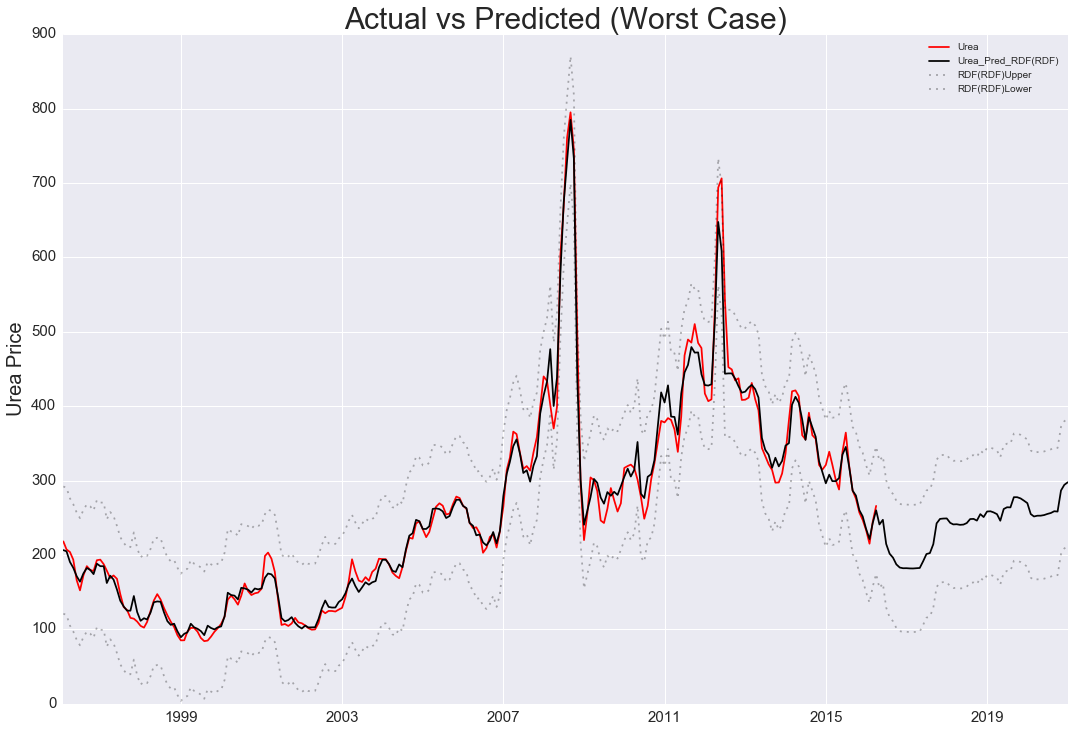

In [106]:
#looking at actual vs predicted monthly
import matplotlib.pyplot as plt
%matplotlib inline

x = (df['Monthly_Date'])
x_pred = (df['Monthly_Date'][243:])
y1 = (df['Urea'])
y2 = (df['Urea_Pred_MLR(MLR)'])
y3 = (df['Urea_Pred_MLR(RDF)'])
y4 = (df['Urea_Pred_RDF(MLR)'][243:])
y5 = (df['Urea_Pred_RDF(RDF)'])
y6 = (df['MLR(MLR)Upper'])
y7 = (df['MLR(MLR)Lower'])
y8 = (df['MLR(RDF)Upper'])
y9 = (df['MLR(RDF)Lower'])
y10 = (df['RDF(MLR)Upper'][243:])
y11 = (df['RDF(MLR)Lower'][243:])
y12 = (df['RDF(RDF)Upper'])
y13 = (df['RDF(RDF)Lower'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'r')
#ax.plot(x,y2,'g')
#ax.plot(x,y3,'b')
#ax.plot(x_pred,y4,'m')
ax.plot(x,y5,'k')
#ax.plot(x,y6,'g--',dashes=(2,5),alpha=0.3)
#ax.plot(x,y7,'g--',dashes=(2,5),alpha=0.3)
#ax.plot(x,y8,'b--',dashes=(2,5),alpha=0.3)
#ax.plot(x,y9,'b--',dashes=(2,5),alpha=0.3)
#ax.plot(x_pred,y10,'m--',dashes=(2,5),alpha=0.3)
#ax.plot(x_pred,y11,'m--',dashes=(2,5),alpha=0.3)
ax.plot(x,y12,'k--',dashes=(2,5),alpha=0.3)
ax.plot(x,y13,'k--',dashes=(2,5),alpha=0.3)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted (Worst Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea Price',size=(20))
plt.show()

In [107]:
#now daily so not as smooth, but first find new std dev of all predicted models
#std dev of each of the different models
MLRMLR_upper2 = combined['Urea_Pred_MLR(MLR)'] + combined['Urea_Pred_MLR(MLR)'].std()
combined['MLR(MLR)Upper'] = MLRMLR_upper2
MLRMLR_lower2 = combined['Urea_Pred_MLR(MLR)'] - combined['Urea_Pred_MLR(MLR)'].std()
combined['MLR(MLR)Lower'] = MLRMLR_lower2

MLRRDF_upper2 = combined['Urea_Pred_MLR(RDF)'] + combined['Urea_Pred_MLR(RDF)'].std()
combined['MLR(RDF)Upper'] = MLRRDF_upper2
MLRRDF_lower2 = combined['Urea_Pred_MLR(RDF)'] - combined['Urea_Pred_MLR(RDF)'].std()
combined['MLR(RDF)Lower'] = MLRRDF_lower2

RDFMLR_upper2 = combined['Urea_Pred_RDF(MLR)'] + combined['Urea_Pred_RDF(MLR)'].std()
combined['RDF(MLR)Upper'] = RDFMLR_upper2
RDFMLR_lower2 = combined['Urea_Pred_RDF(MLR)'] - combined['Urea_Pred_RDF(MLR)'].std()
combined['RDF(MLR)Lower'] = RDFMLR_lower2

RDFRDF_upper2 = combined['Urea_Pred_RDF(RDF)'] + combined['Urea_Pred_RDF(RDF)'].std()
combined['RDF(RDF)Upper'] = RDFRDF_upper2
RDFRDF_lower2 = combined['Urea_Pred_RDF(RDF)'] - combined['Urea_Pred_RDF(RDF)'].std()
combined['RDF(RDF)Lower'] = RDFRDF_lower2

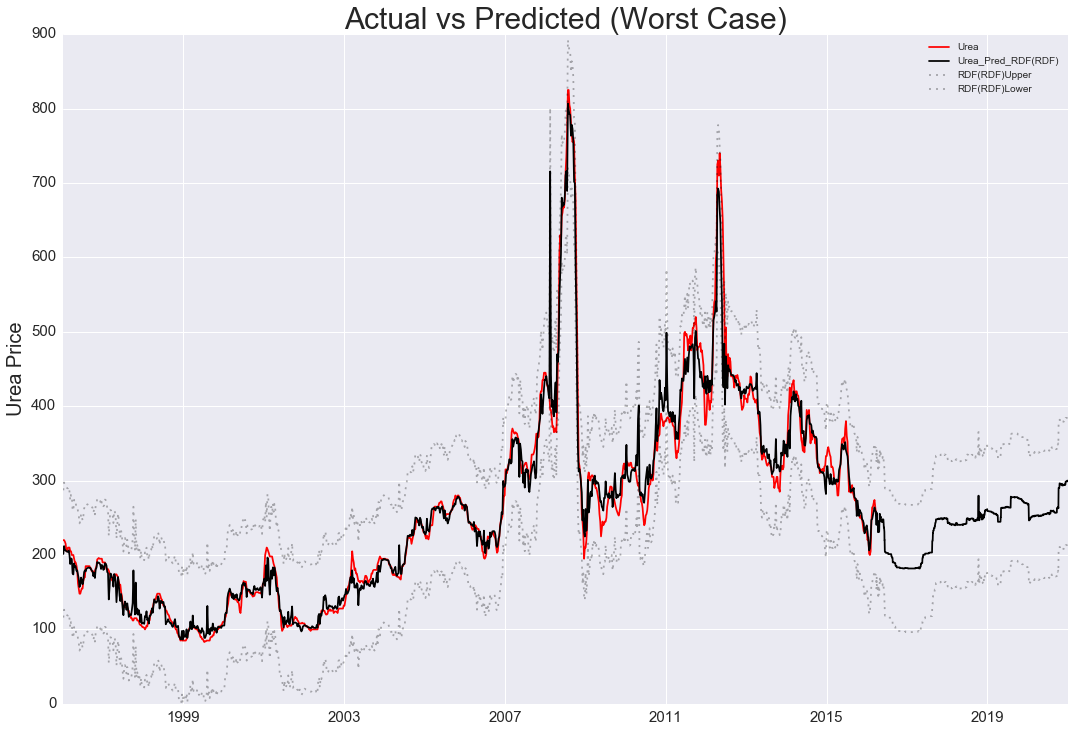

In [110]:
#looking at daily actual vs predicted
x = (combined['Date'])
x_pred = (combined['Date'][1056:])
y1 = (combined['Urea'])
y2 = (combined['Urea_Pred_MLR(MLR)'])
y3 = (combined['Urea_Pred_MLR(RDF)'])
y4 = (combined['Urea_Pred_RDF(MLR)'][1056:])
y5 = (combined['Urea_Pred_RDF(RDF)'])
y6 = (combined['MLR(MLR)Upper'])
y7 = (combined['MLR(MLR)Lower'])
y8 = (combined['MLR(RDF)Upper'])
y9 = (combined['MLR(RDF)Lower'])
y10 = (combined['RDF(MLR)Upper'][1056:])
y11 = (combined['RDF(MLR)Lower'][1056:])
y12 = (combined['RDF(RDF)Upper'])
y13 = (combined['RDF(RDF)Lower'])
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'r')
#ax.plot(x,y2,'g')
#ax.plot(x,y3,'b')
#ax.plot(x_pred,y4,'m')
ax.plot(x,y5,'k')
#ax.plot(x,y6,'g--',dashes=(2,5),alpha=0.3)
#ax.plot(x,y7,'g--',dashes=(2,5),alpha=0.3)
#ax.plot(x,y8,'b--',dashes=(2,5),alpha=0.3)
#ax.plot(x,y9,'b--',dashes=(2,5),alpha=0.3)
#ax.plot(x_pred,y10,'m--',dashes=(2,5),alpha=0.3)
#ax.plot(x_pred,y11,'m--',dashes=(2,5),alpha=0.3)
ax.plot(x,y12,'k--',dashes=(2,5),alpha=0.3)
ax.plot(x,y13,'k--',dashes=(2,5),alpha=0.3)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_title('Actual vs Predicted (Worst Case)', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea Price',size=(20))
plt.show()